# Node classification - Real world dataset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [2]:
pal = sns.color_palette("Paired", 11)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10]}


In [3]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":20, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [6]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real'

jsonpath = f'/cluster/home/kamara/Explain/configs/config_real_sparsity_avg10expe.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'nc_real_sparsity_avg10expe.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [7]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)

In [8]:
df_sparsity["1-fidelity_acc-"] = 1- df_sparsity["fidelity_acc-"]
df_sparsity["1-fidelity_prob-"] = 1- df_sparsity["fidelity_prob-"]
df_sparsity['charact_prob'] = 2 * df_sparsity['fidelity_prob+'] * (1-df_sparsity['fidelity_prob-'])/ (df_sparsity['fidelity_prob+']  + 1-df_sparsity['fidelity_prob-'])
df_sparsity['charact_acc'] = 2 * df_sparsity['fidelity_acc+'] * (1-df_sparsity['fidelity_acc-'])/ (df_sparsity['fidelity_acc+']  + 1-df_sparsity['fidelity_acc-'])


In [9]:
df_sparsity["1-fidelity_gnn_acc-"] = 1- df_sparsity["fidelity_gnn_acc-"]
df_sparsity["1-fidelity_gnn_prob-"] = 1- df_sparsity["fidelity_gnn_prob-"]
df_sparsity['charact_gnn_prob'] = 2 * df_sparsity['fidelity_gnn_prob+'] * (1-df_sparsity['fidelity_gnn_prob-'])/ (df_sparsity['fidelity_gnn_prob+']  + 1-df_sparsity['fidelity_gnn_prob-'])
df_sparsity['charact_gnn_acc'] = 2 * df_sparsity['fidelity_gnn_acc+'] * (1-df_sparsity['fidelity_gnn_acc-'])/ (df_sparsity['fidelity_gnn_acc+']  + 1-df_sparsity['fidelity_gnn_acc-'])


In [10]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

,dataset,true_label_as_target,hard_mask,sparsity,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,non_zero_values_init,type,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,actor,False,False,0.000,basic_gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,1769.996,pertubation,2.000,2.000000,-4.000000,-4.000000,0.688,0.911751,0.257719,0.704590
1,actor,False,False,0.000,distance,100.0,-1.000,-1.000,-1.000000,-1.000000,...,60913.117,baseline,2.000,2.000000,-4.000000,-4.000000,0.313,0.848817,0.299813,0.453063
2,actor,False,False,0.000,gnnexplainer,100.0,-1.000,-1.000,-1.000000,-1.000000,...,1769.996,pertubation,2.000,2.000000,-4.000000,-4.000000,0.247,0.824252,0.293234,0.381333
3,actor,False,False,0.000,gradcam,100.0,-1.000,-1.000,-1.000000,-1.000000,...,35346.504,gradient,2.000,2.000000,-4.000000,-4.000000,0.307,0.847008,0.289308,0.438979
4,actor,False,False,0.000,ig,100.0,-1.000,-1.000,-1.000000,-1.000000,...,59053.126,gradient,2.000,2.000000,-4.000000,-4.000000,0.360,0.859186,0.298096,0.501818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,wisconsin,True,True,0.997,gnnexplainer,100.0,0.666,0.458,0.545173,0.308689,...,287.783,pertubation,0.542,0.691311,0.609606,0.597636,2.000,2.000000,-4.000000,-4.000000
1231,wisconsin,True,True,0.997,ig,100.0,0.366,0.063,0.246022,-0.068371,...,1120.830,gradient,0.937,1.068371,0.399946,0.526388,2.000,2.000000,-4.000000,-4.000000
1232,wisconsin,True,True,0.997,occlusion,100.0,0.667,0.205,0.545069,0.080260,...,287.783,pertubation,0.795,0.919740,0.684488,0.725397,2.000,2.000000,-4.000000,-4.000000
1233,wisconsin,True,True,0.997,pagerank,100.0,0.290,0.077,0.171710,-0.056536,...,1087.551,baseline,0.923,1.056536,0.295409,0.441336,2.000,2.000000,-4.000000,-4.000000


# Mask statistics - select dataset

In [11]:
input_dataset = "cora"

df_mask_dataset = df_sparsity[(df_sparsity.dataset==input_dataset)&(df_sparsity.true_label_as_target==True)&(df_sparsity.hard_mask==True)]
dfc = df_mask_dataset[["sparsity", "explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact_prob"]]
pd.pivot_table(dfc, values=["mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact_prob"], index=['explainer_name'], columns='sparsity')

charact_prob                                \
sparsity                  0.000     0.700     0.990     0.997   
explainer_name                                                  
basic_gnnexplainer     0.888295  0.888239  0.708630       NaN   
distance               0.888239  0.888239  0.847165  0.676374   
gnnexplainer           0.901097  0.900135  0.801217  0.631284   
gradcam                0.889261  0.900203  0.900165       NaN   
ig                     0.893199  0.903876  0.843251  0.781939   
occlusion              0.888239  0.888239  0.901857  0.910674   
pagerank               0.888239  0.888239  0.888114  0.885272   
pgmexplainer           0.888063  0.888063  0.837596       NaN   
random                 0.875991  0.105070 -0.016137 -0.020021   
sa                     0.835790  0.773156  0.766987  0.756765   

                   mask_entropy_transf                                \
sparsity                         0.000     0.700     0.990     0.997   
explainer_name                                                         
basic_gnnexplainer            3.349020  3.354905  3.050704       NaN   
distance                      8.821895  7.770875  4.628689  3.490691   
gnnexplainer                  2.969710  2.962727  2.537860  2.101806   
gradcam                       4.382617  4.169360  3.471286       NaN   
ig                            7.488717  6.566443  4.315707  3.414891   
occlusion                     4.315175  4.315175  3.996786  3.374415   
pagerank                      5.678179  5.677181  4.261065  3.342843   
pgmexplainer                  5.050473  5.050473  4.353894       NaN   
random                        9.299681  8.283580  4.882798  3.663561   
sa                            5.970723  5.596844  4.294452  3.434591   

                   mask_size_transf                            max_avg_transf  \
sparsity                      0.000     0.700    0.990   0.997          0.000   
explainer_name                                                                  
basic_gnnexplainer          176.660   176.661   76.825     NaN       0.388671   
distance                  11577.426  3650.878  123.179  36.974       0.170255   
gnnexplainer                176.660   176.660   76.824  32.822       0.138251   
gradcam                    2270.587   729.460   68.953     NaN       0.132805   
ig                         9307.147  2817.850  112.703  36.148       0.137155   
occlusion                   176.661   176.661   76.825  32.823       0.817187   
pagerank                   2097.576  2087.026  123.011  36.974       0.048300   
pgmexplainer                402.402   402.402  104.204     NaN       0.453154   
random                    13249.918  3979.000  132.000  39.000       0.476803   
sa                         4184.238  1439.096  108.303  36.191       0.280061   

                                                  
sparsity               0.700     0.990     0.997  
explainer_name                                    
basic_gnnexplainer  0.387007  0.389244       NaN  
distance            0.203984  0.362239  0.448259  
gnnexplainer        0.138309  0.139283  0.160636  
gradcam             0.133562  0.140053       NaN  
ig                  0.140203  0.265152  0.393372  
occlusion           0.817187  0.817369  0.818041  
pagerank            0.048306  0.127857  0.232930  
pgmexplainer        0.453154  0.622286       NaN  
random              0.839479  0.993793  0.998005  
sa                  0.281683  0.383181  0.539364

# Performance Summary
## When label is true...

In [12]:
input_sparsity = 0.997

df_perf = df_sparsity[(df_sparsity.sparsity==input_sparsity)&(df_sparsity.true_label_as_target==True)]
dfc = df_perf[["dataset", "explainer_name", "charact_prob", "hard_mask"]]
pd.pivot_table(dfc, values="charact_prob", index=['explainer_name'], columns=['hard_mask', 'dataset'])

hard_mask          False                                                    \
dataset            actor chameleon  citeseer      cora   cornell  facebook   
explainer_name                                                               
distance             NaN       NaN  0.582502  0.471364       NaN  0.337409   
gnnexplainer    0.341009  0.479863  0.569623  0.443417  0.411973  0.292784   
ig              0.331169  0.297011  0.663982  0.596140  0.401211  0.431764   
occlusion       0.391939  0.645284  0.808415  0.846538  0.593570  0.813862   
pagerank        0.330081  0.406829  0.681189  0.628857  0.437114  0.413530   
random          0.312305  0.372029  0.237135  0.209981  0.263889  0.224959   
sa                   NaN       NaN       NaN  0.666477       NaN       NaN   

hard_mask                                         True                      \
dataset           pubmed     texas wisconsin     actor chameleon  citeseer   
explainer_name                                                               
distance        0.451613       NaN       NaN       NaN       NaN  0.787140   
gnnexplainer    0.498295  0.401964  0.426012  0.147034  0.648271  0.789713   
ig              0.518393  0.271335  0.379551  0.386773  0.625087  0.835136   
occlusion       0.662758  0.532942  0.591889  0.468269  0.772743  0.879737   
pagerank        0.523445  0.359096  0.390706  0.369378  0.564077  0.865140   
random          0.245618  0.249999  0.267861 -0.054269  0.435676 -0.035515   
sa                   NaN       NaN       NaN       NaN       NaN       NaN   

hard_mask                                                                   
dataset             cora   cornell  facebook    pubmed     texas wisconsin  
explainer_name                                                              
distance        0.676374       NaN  0.710058  0.656765       NaN       NaN  
gnnexplainer    0.631284  0.585133  0.705445  0.645965  0.560383  0.609606  
ig              0.781939  0.403509  0.747911  0.683018  0.292839  0.399946  
occlusion       0.910674  0.647296  0.879230  0.724334  0.598811  0.684488  
pagerank        0.885272  0.404519  0.822300  0.693152  0.317324  0.295409  
random         -0.020021  0.164176  0.004049 -0.239593  0.067658  0.149758  
sa              0.756765       NaN       NaN       NaN       NaN       NaN

# Explain focus: Phenomenon

true_label_as_target = True

In [13]:
df = df_sparsity[df_sparsity['true_label_as_target']==True]

In [14]:
#### Robustness ####
df_sparse = df[df['sparsity'] == 0.997]
df_dense = df[df['sparsity'] == 0]
df_sparse = df_sparse[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact_prob"]].reset_index()
df_dense = df_dense[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact_prob"]].reset_index()
df_robust = pd.merge(df_dense, df_sparse, on=["dataset", "true_label_as_target", "hard_mask", "explainer_name"], how="outer", suffixes=["_0", "_0.997"])

df_robust["robustness"] = (df_robust["charact_prob_0.997"]-df_robust["charact_prob_0"])/0.997

robustness = pd.pivot_table(df_robust, values='robustness', index=['explainer_name'], columns='dataset')
robustness['robustness'] = robustness.mean(axis=1)
robustness.sort_values(by=['robustness'])

dataset,actor,chameleon,citeseer,cora,cornell,facebook,pubmed,texas,wisconsin,robustness
explainer_name,,,,,,,,,,
random,-0.236334,-0.123885,-0.568498,-0.578661,-0.414653,-0.541997,-0.579182,-0.486966,-0.425433,-0.439512
ig,0.002140,-0.060826,-0.031915,-0.086716,-0.338555,-0.060453,-0.015918,-0.423198,-0.328321,-0.149307
pagerank,-0.000902,0.002221,-0.005872,-0.010379,-0.320941,-0.001352,-0.000341,-0.412391,-0.376944,-0.125211
gnnexplainer,-0.118366,0.009650,-0.046714,-0.135390,-0.194715,-0.061261,-0.027154,-0.193386,-0.171103,-0.104271
distance,NaN,NaN,-0.072415,-0.182338,NaN,-0.097686,-0.031035,NaN,NaN,-0.095868
sa,NaN,NaN,NaN,-0.064410,NaN,NaN,NaN,NaN,NaN,-0.064410
occlusion,0.060600,0.102982,0.004160,0.010294,-0.154756,0.033419,0.018361,-0.229518,-0.145447,-0.033323


## Hard mask

In [15]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [16]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_sparsity_init  non_zero_values_init  \
dataset   explainer_name                                                 
actor     basic_gnnexplainer            0.974814              1534.258   
          distance                      0.000082             60913.001   
          gnnexplainer                  0.974814              1534.258   
          gradcam                       0.492803             30897.398   
          ig                            0.048020             57992.696   
...                                          ...                   ...   
wisconsin occlusion                     0.749971               287.783   
          pagerank                      0.055125              1087.551   
          pgmexplainer                  0.535481               534.661   
          random                        0.001849              1148.872   
          sa                            0.253541               859.174   

                              number_of_edges     time  fidelity_prob+  \
dataset   explainer_name                                                 
actor     basic_gnnexplainer          60918.0  3.81918        0.224672   
          distance                    60918.0  0.72569        0.224672   
          gnnexplainer                60918.0  4.06454        0.224672   
          gradcam                     60918.0  0.00528        0.226693   
          ig                          60918.0  0.24760        0.247694   
...                                       ...      ...             ...   
wisconsin occlusion                    1151.0  0.34499        0.683610   
          pagerank                     1151.0  0.02187        0.670511   
          pgmexplainer                 1151.0  1.60760        0.665067   
          random                       1151.0  0.00010        0.129370   
          sa                           1151.0  0.00282        0.283314   

                              fidelity_prob-  charact_prob  
dataset   explainer_name                                    
actor     basic_gnnexplainer       -0.035130      0.369209  
          distance                 -0.035130      0.369209  
          gnnexplainer             -0.341218      0.384873  
          gradcam                  -0.081832      0.374840  
          ig                       -0.079648      0.402944  
...                                      ...           ...  
wisconsin occlusion                -0.089928      0.840226  
          pagerank                  0.062031      0.782003  
          pgmexplainer              0.054024      0.781031  
          random                    0.326686      0.217039  
          sa                        0.444987      0.375136  

[90 rows x 7 columns]

In [17]:
#### Initial mask sparsity ####
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset,actor,chameleon,citeseer,cora,cornell,facebook,pubmed,texas,wisconsin,mean_sparsity
explainer_name,,,,,,,,,,
random,0.001016,0.001016,0.001075,0.001062,0.002361,0.001005,0.001013,0.002366,0.001849,0.001418
distance,0.000082,0.000116,0.504017,0.127154,0.008383,0.000030,0.000082,0.008001,0.011982,0.073316
ig,0.048020,0.006041,0.549513,0.298315,0.051065,0.054913,0.137702,0.049003,0.026212,0.135643
sa,0.524559,0.278372,0.625508,0.684542,0.223597,0.167691,0.477494,0.198242,0.253541,0.381505
pagerank,0.727567,0.594013,0.942985,0.841859,0.038231,0.934797,0.949610,0.033312,0.055125,0.568611
gradcam,0.492803,0.257936,0.889183,0.828816,0.482890,0.648733,0.815990,0.558366,0.491467,0.607354
pgmexplainer,0.900942,0.710803,0.987207,0.969662,0.520543,0.948724,0.986518,0.416190,0.535481,0.775119
occlusion,0.974814,0.770067,0.994040,0.986681,0.718643,0.978489,0.996743,0.617054,0.749971,0.865167
basic_gnnexplainer,0.974814,0.770067,0.994040,0.986681,0.718643,0.978489,0.996743,0.617054,0.749971,0.865167


In [18]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset,actor,chameleon,citeseer,cora,cornell,facebook,pubmed,texas,wisconsin,mean_time
explainer_name,,,,,,,,,,
random,0.00057,0.00060,0.00021,0.00020,0.00010,0.00295,0.00099,0.00009,0.00010,0.000646
gradcam,0.00528,0.00497,0.00459,0.00416,0.00560,0.01011,0.00608,0.00371,0.00377,0.005363
sa,0.02874,0.00907,0.04142,0.00700,0.00266,0.01120,0.03620,0.00270,0.00282,0.015757
ig,0.24760,0.19394,0.31955,0.16652,0.11958,0.26600,0.29461,0.11869,0.11986,0.205150
distance,0.72569,0.57398,0.84250,0.27767,0.01409,1.76693,1.34080,0.01299,0.02112,0.619530
pagerank,0.85127,0.68378,0.84696,0.30143,0.01562,2.45649,1.45074,0.01633,0.02187,0.738277
gnnexplainer,4.06454,3.97936,3.61229,3.64250,4.08692,3.77636,3.61519,3.65996,3.71115,3.794252
basic_gnnexplainer,3.81918,3.97750,3.66474,3.76319,4.07391,3.82305,4.04053,4.11592,4.06483,3.926983
occlusion,3.35632,20.72795,0.94677,0.55316,0.24664,21.11558,2.24663,0.33129,0.34499,5.541037


In [20]:
#### Average characterization power among datasets for sparsity=0.99 ####
df_char = pd.pivot_table(res_init, values='charact_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])#.reset_index()

dataset,actor,chameleon,citeseer,cora,cornell,facebook,pubmed,texas,wisconsin,mean_charact
explainer_name,,,,,,,,,,
random,-0.028786,0.470490,0.165962,0.105070,0.247866,0.106831,-0.069298,0.198290,0.217039,0.157052
sa,0.461118,0.630303,0.677137,0.773156,0.450405,0.304380,0.312797,0.433731,0.375136,0.490907
basic_gnnexplainer,0.369209,0.486216,0.868756,0.888239,0.619358,0.821488,0.693369,0.522484,0.652409,0.657947
pgmexplainer,0.369102,0.552578,0.868764,0.888063,0.778809,0.822621,0.693369,0.796401,0.781031,0.727860
pagerank,0.369209,0.551379,0.868754,0.888239,0.771929,0.822621,0.693369,0.805244,0.782003,0.728083
distance,0.369209,0.553792,0.868754,0.888239,0.787347,0.822621,0.693369,0.810447,0.783481,0.730807
gnnexplainer,0.384873,0.557003,0.877378,0.900135,0.812801,0.824831,0.702661,0.823048,0.831040,0.745974
ig,0.402944,0.647443,0.879003,0.903876,0.781465,0.840952,0.709219,0.776376,0.789013,0.747810
occlusion,0.369209,0.638364,0.868754,0.888239,0.843439,0.822929,0.693369,0.838333,0.840226,0.755874


In [22]:
#### Average characterization power for Cora according to sparsity ####
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact_prob', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.875991,0.105070,-0.016137,-0.020021,0.236226
sa,0.835790,0.773156,0.766987,0.756765,0.783175
gnnexplainer,0.901097,0.900135,0.801217,0.631284,0.808433
distance,0.888239,0.888239,0.847165,0.676374,0.825004
basic_gnnexplainer,0.888295,0.888239,0.708630,NaN,0.828388
ig,0.893199,0.903876,0.843251,0.781939,0.855566
pgmexplainer,0.888063,0.888063,0.837596,NaN,0.871240
pagerank,0.888239,0.888239,0.888114,0.885272,0.887466
gradcam,0.889261,0.900203,0.900165,NaN,0.896543


### Analysis after mask tranformation

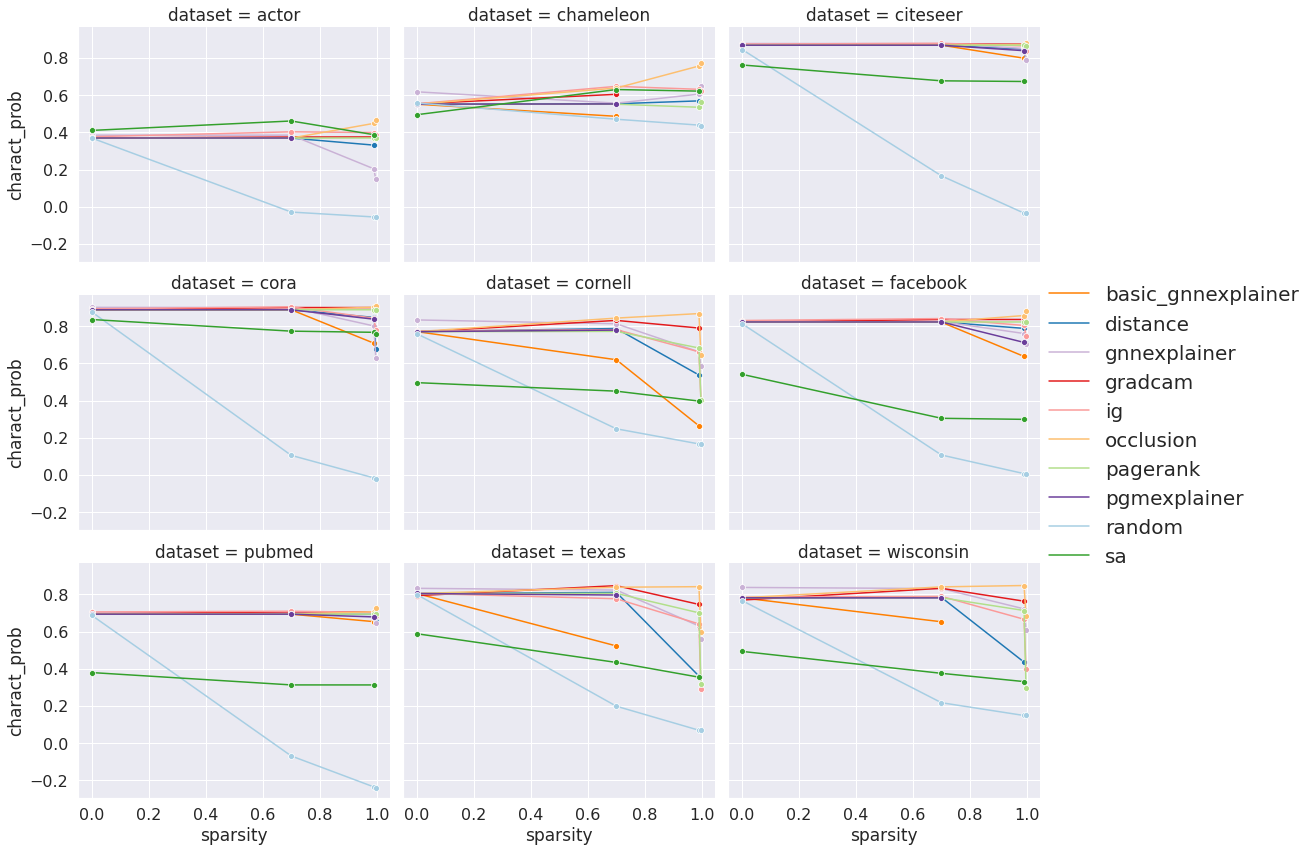

In [24]:
g = sns.FacetGrid(df_hard, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="sparsity", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o")

g.add_legend()

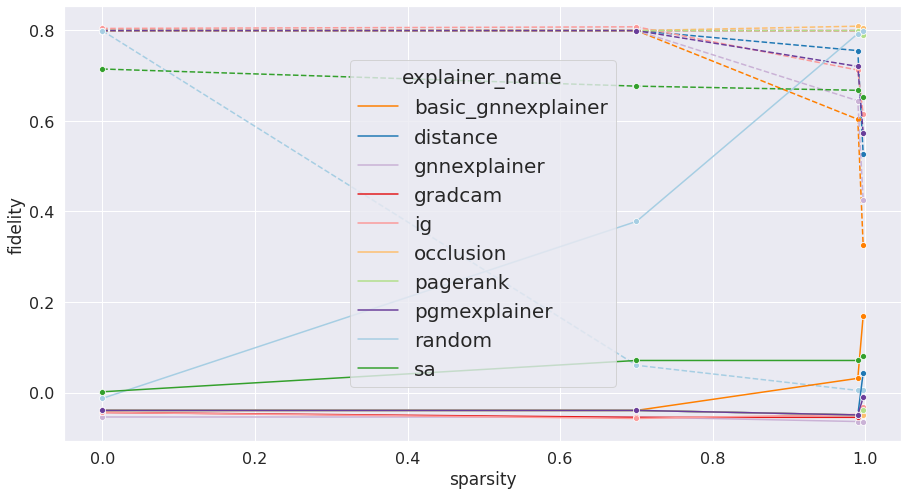

In [56]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

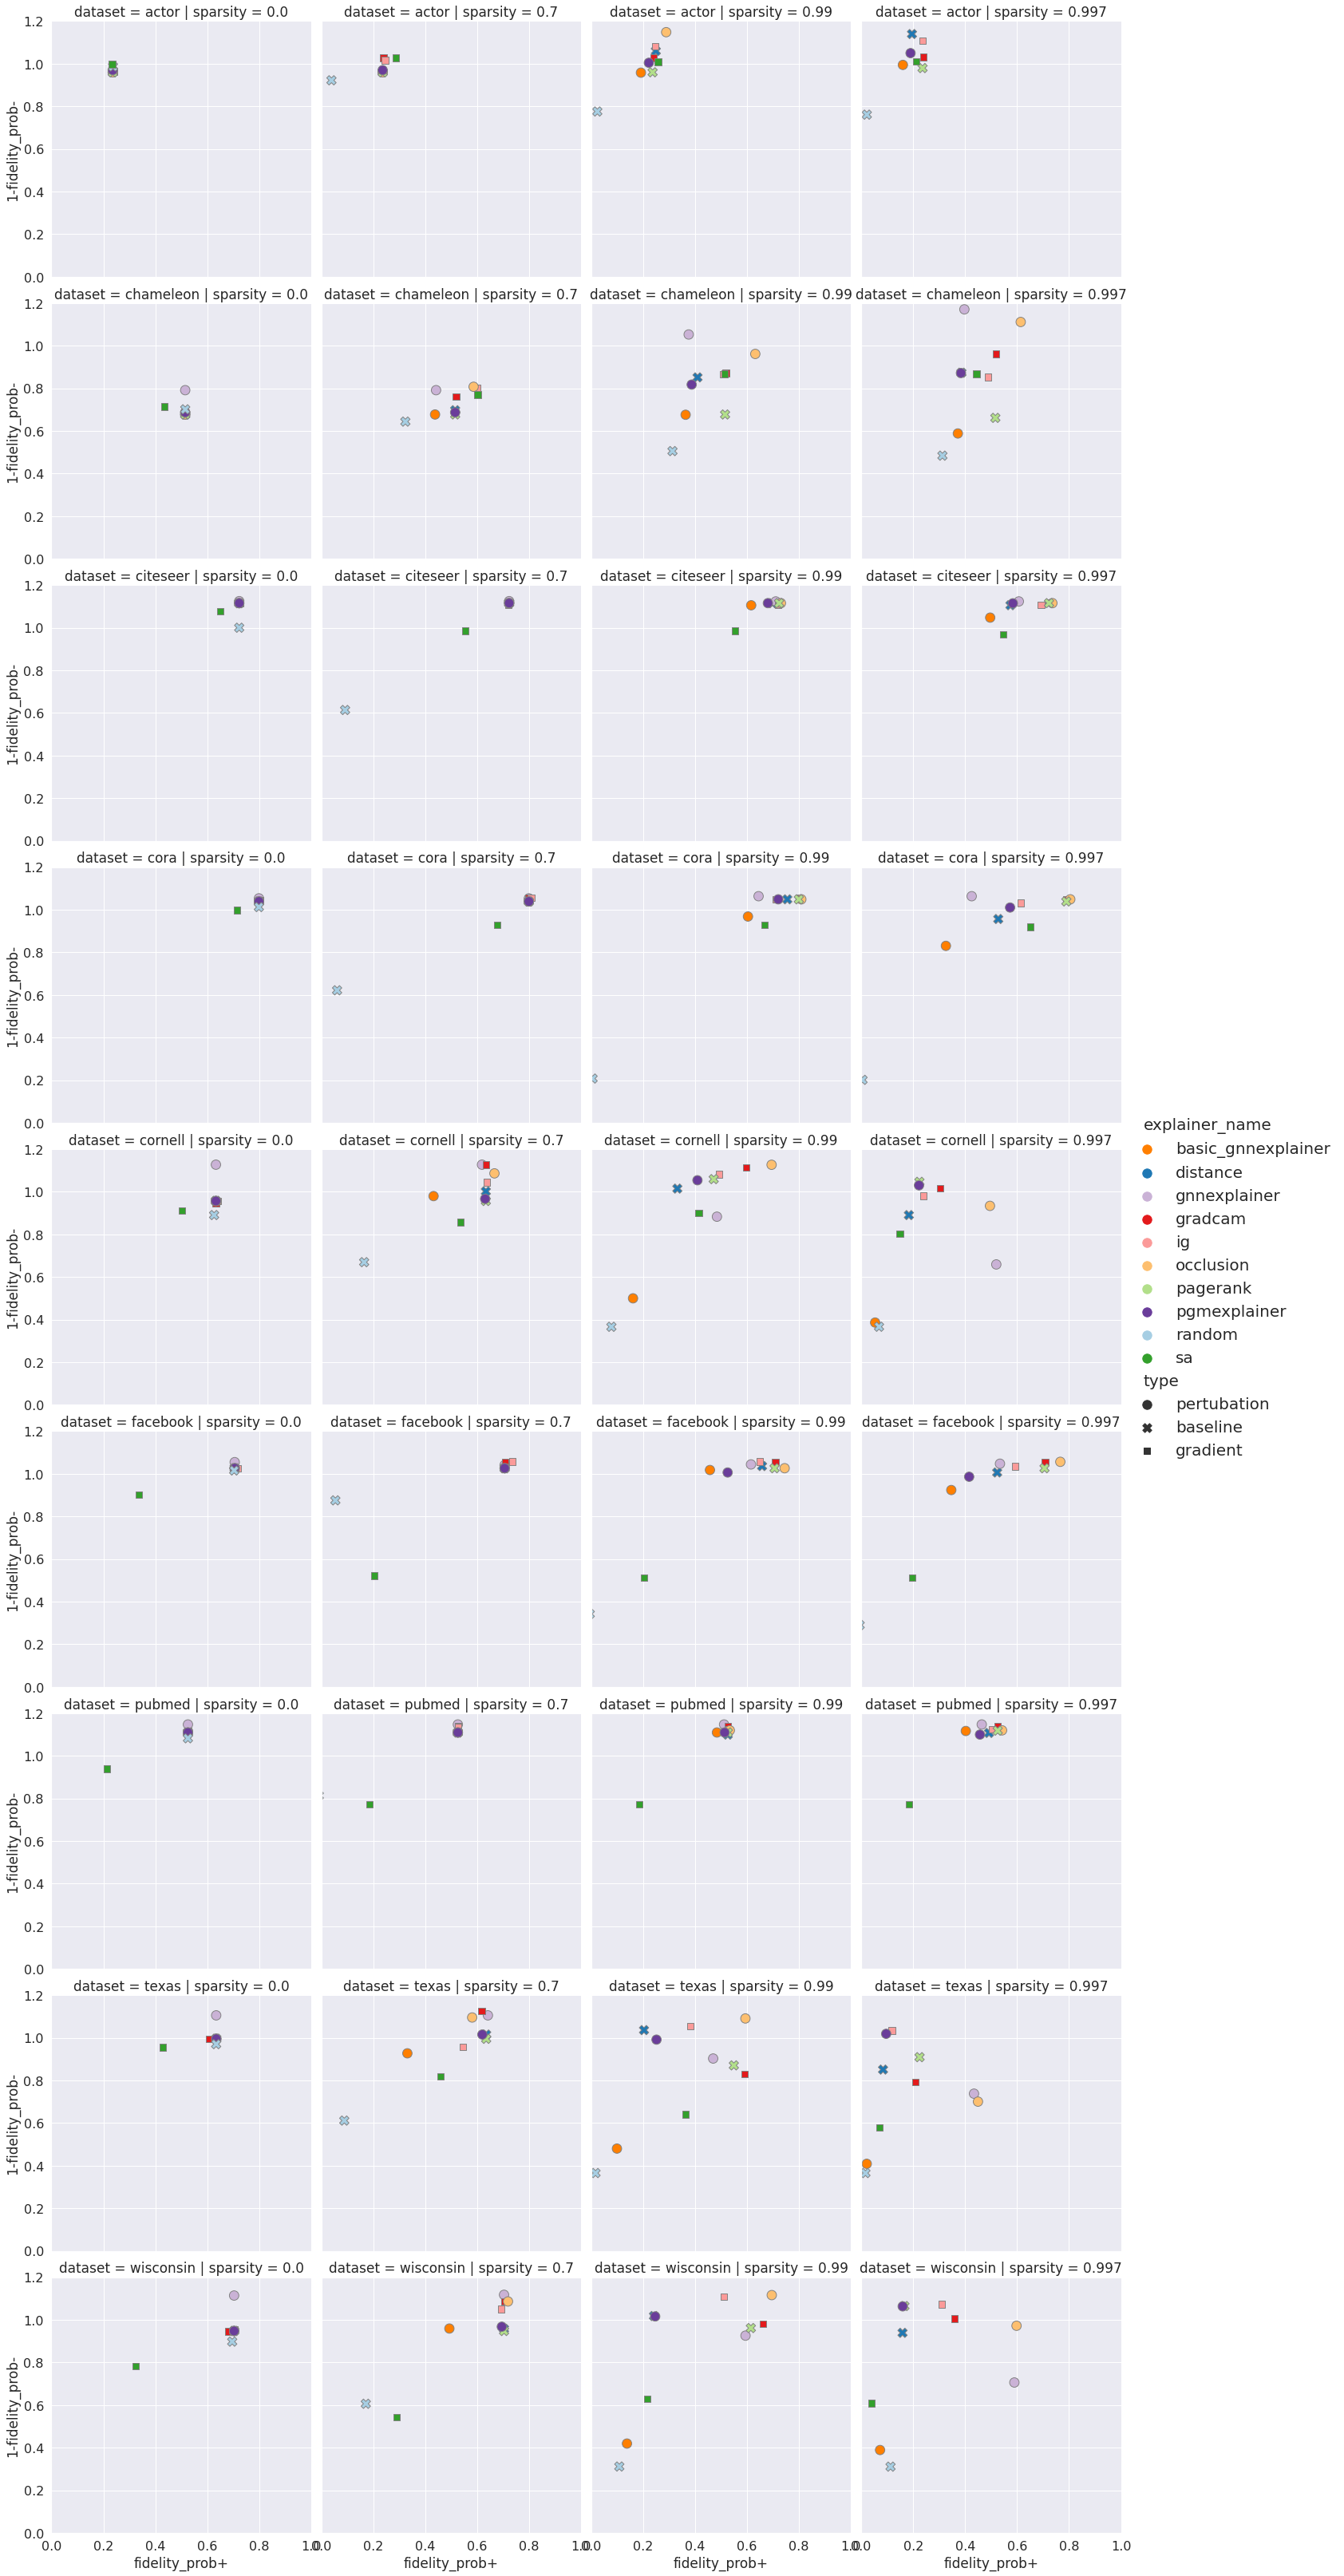

In [57]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
    data=df_hard,
    x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
    hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
)
plt.xlim(0, 1)
plt.ylim(0, 1.2)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 
    

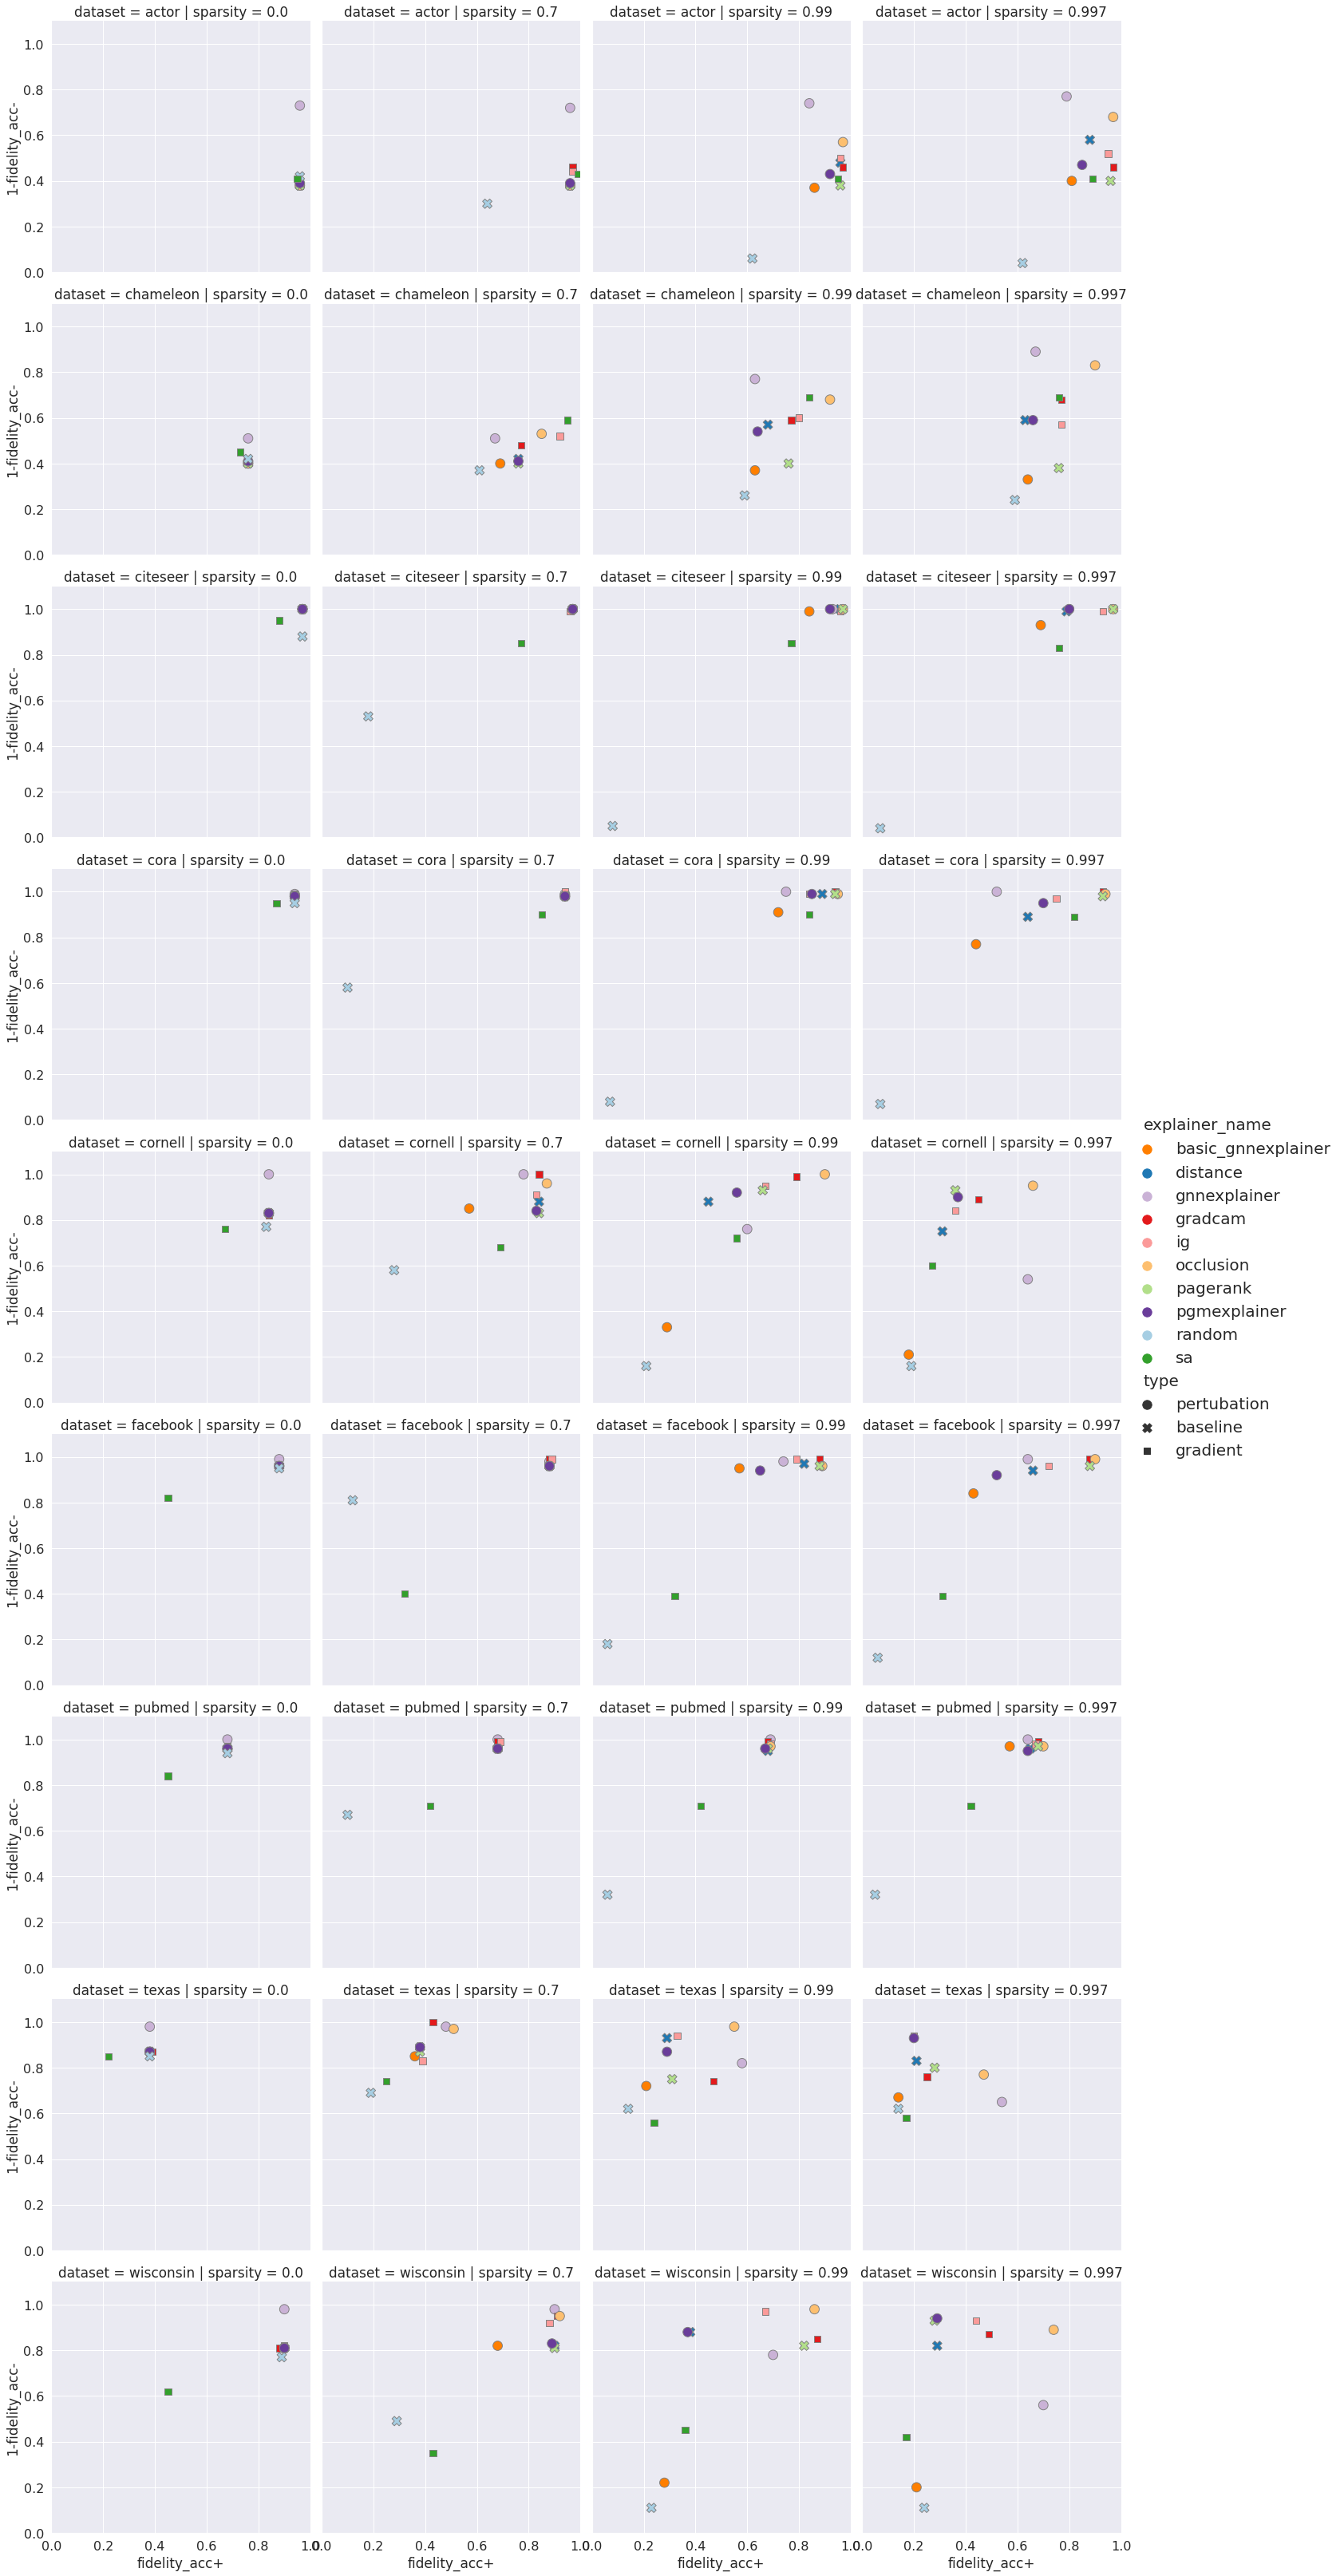

In [58]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 


## Soft mask

In [88]:
df_soft = df[df.hard_mask==False]

In [90]:
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,actor,chameleon,citeseer,cora,cornell,facebook,pubmed,texas,wisconsin,mean_charact
explainer_name,,,,,,,,,,
random,0.350662,0.462375,0.361631,0.324041,0.402818,0.331473,0.375863,0.364451,0.379121,0.372493
sa,0.284233,0.426484,0.645584,0.702902,0.596257,0.209087,0.313123,0.519113,0.370275,0.451895
gnnexplainer,0.352790,0.481409,0.581967,0.458855,0.549903,0.273726,0.491555,0.535440,0.518109,0.471528
basic_gnnexplainer,0.301027,0.601767,0.438442,0.444535,0.479175,0.726920,0.436895,0.456148,0.447581,0.481388
distance,0.363055,0.431486,0.644589,0.634710,0.643800,0.421228,0.486837,0.516397,0.580103,0.524689
gradcam,0.343140,0.430708,0.603466,0.580088,0.672974,0.389908,0.488481,0.644722,0.661474,0.534996
pagerank,0.340871,0.425691,0.678990,0.668079,0.699681,0.409355,0.528700,0.652011,0.670091,0.563719
ig,0.345815,0.492215,0.685129,0.670703,0.714530,0.473367,0.525716,0.517125,0.670818,0.566157
pgmexplainer,0.359612,0.518046,0.821347,0.832140,0.773794,0.759977,0.645566,0.678558,0.751133,0.682241


In [61]:
#### Average characterization power for Cora according to sparsity ####
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
res_init = df1[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.470291,0.324041,0.206323,0.203478,0.301033
basic_gnnexplainer,0.506955,0.444535,0.338318,0.216649,0.376614
gnnexplainer,0.461741,0.458855,0.456158,0.452830,0.457396
gradcam,0.580044,0.580088,0.578474,0.570331,0.577234
distance,0.634710,0.634710,0.579903,0.480334,0.582414
ig,0.670580,0.670703,0.641816,0.608813,0.647978
pagerank,0.668079,0.668079,0.662663,0.649760,0.662145
sa,0.725625,0.702902,0.697739,0.681368,0.701909
pgmexplainer,0.832140,0.832140,0.791199,0.709252,0.791183


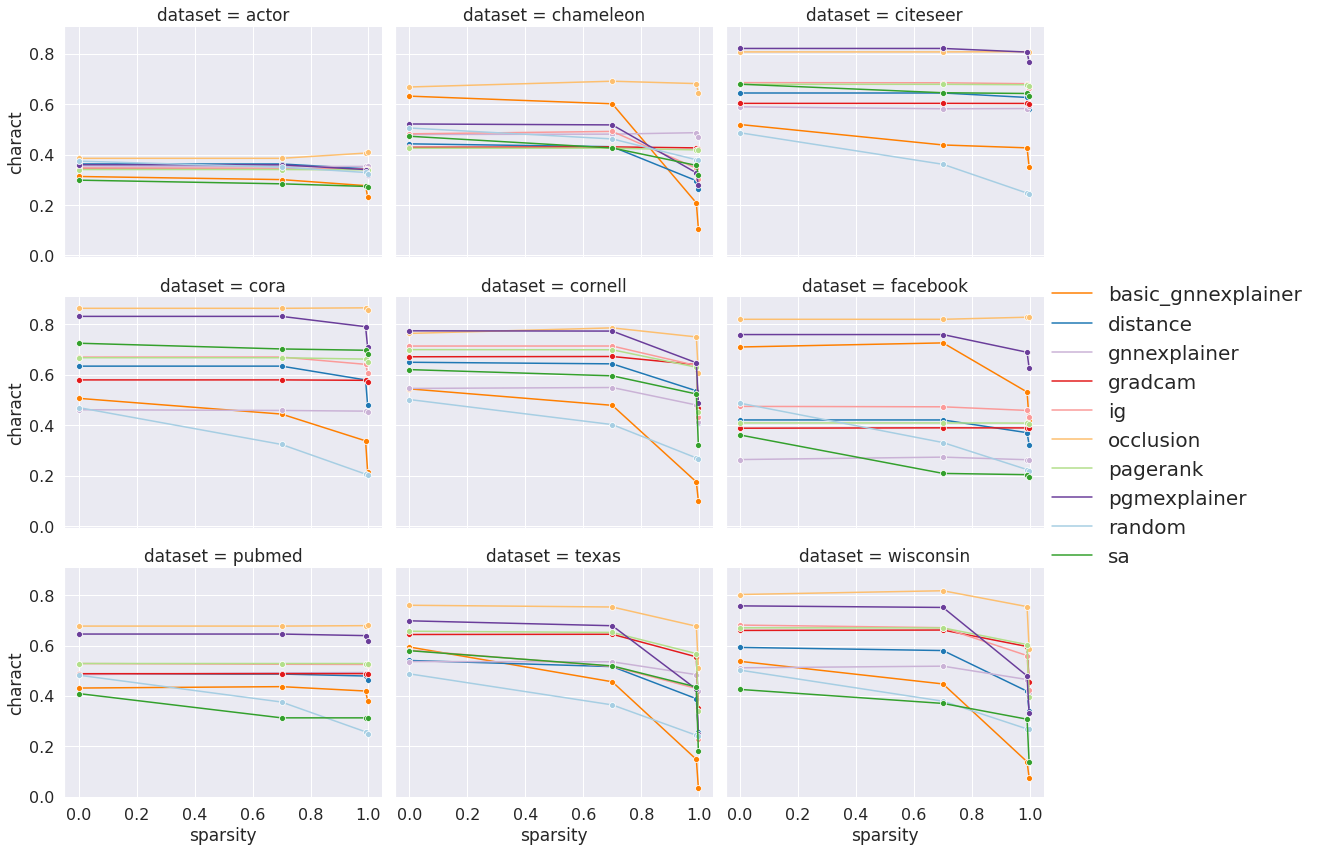

In [81]:
g = sns.FacetGrid(df_soft, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="sparsity", y="charact",
    hue="explainer_name", palette=dict_color, marker="o")

g.add_legend()

<AxesSubplot:xlabel='sparsity', ylabel='charact'>

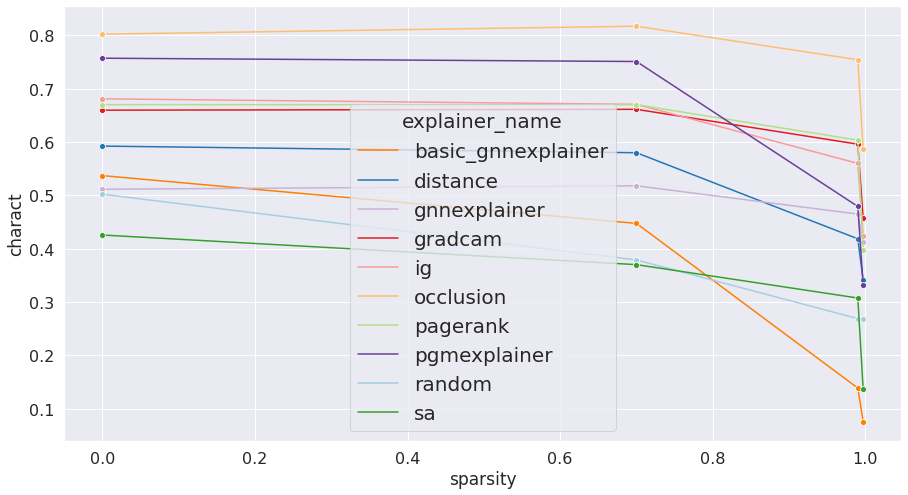

In [66]:
dataset_name = "wisconsin"

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df_soft[df_soft.dataset==dataset_name],
    x="sparsity", y="charact",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


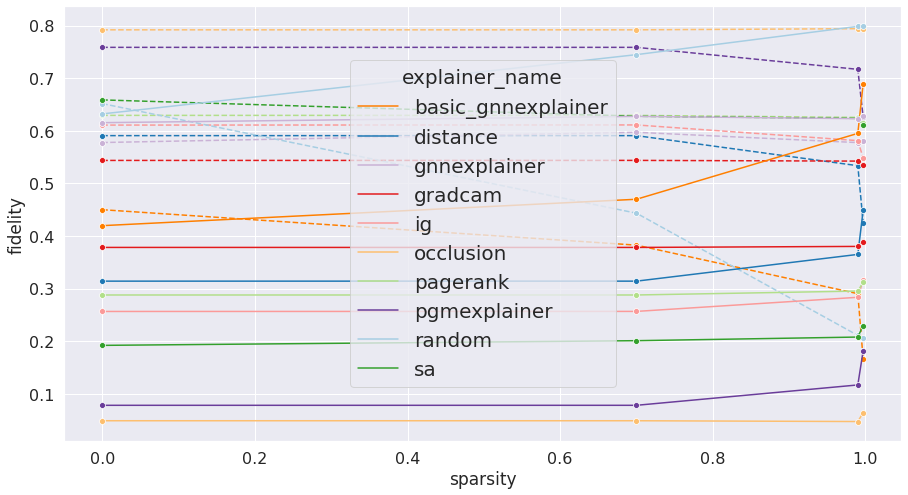

In [62]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

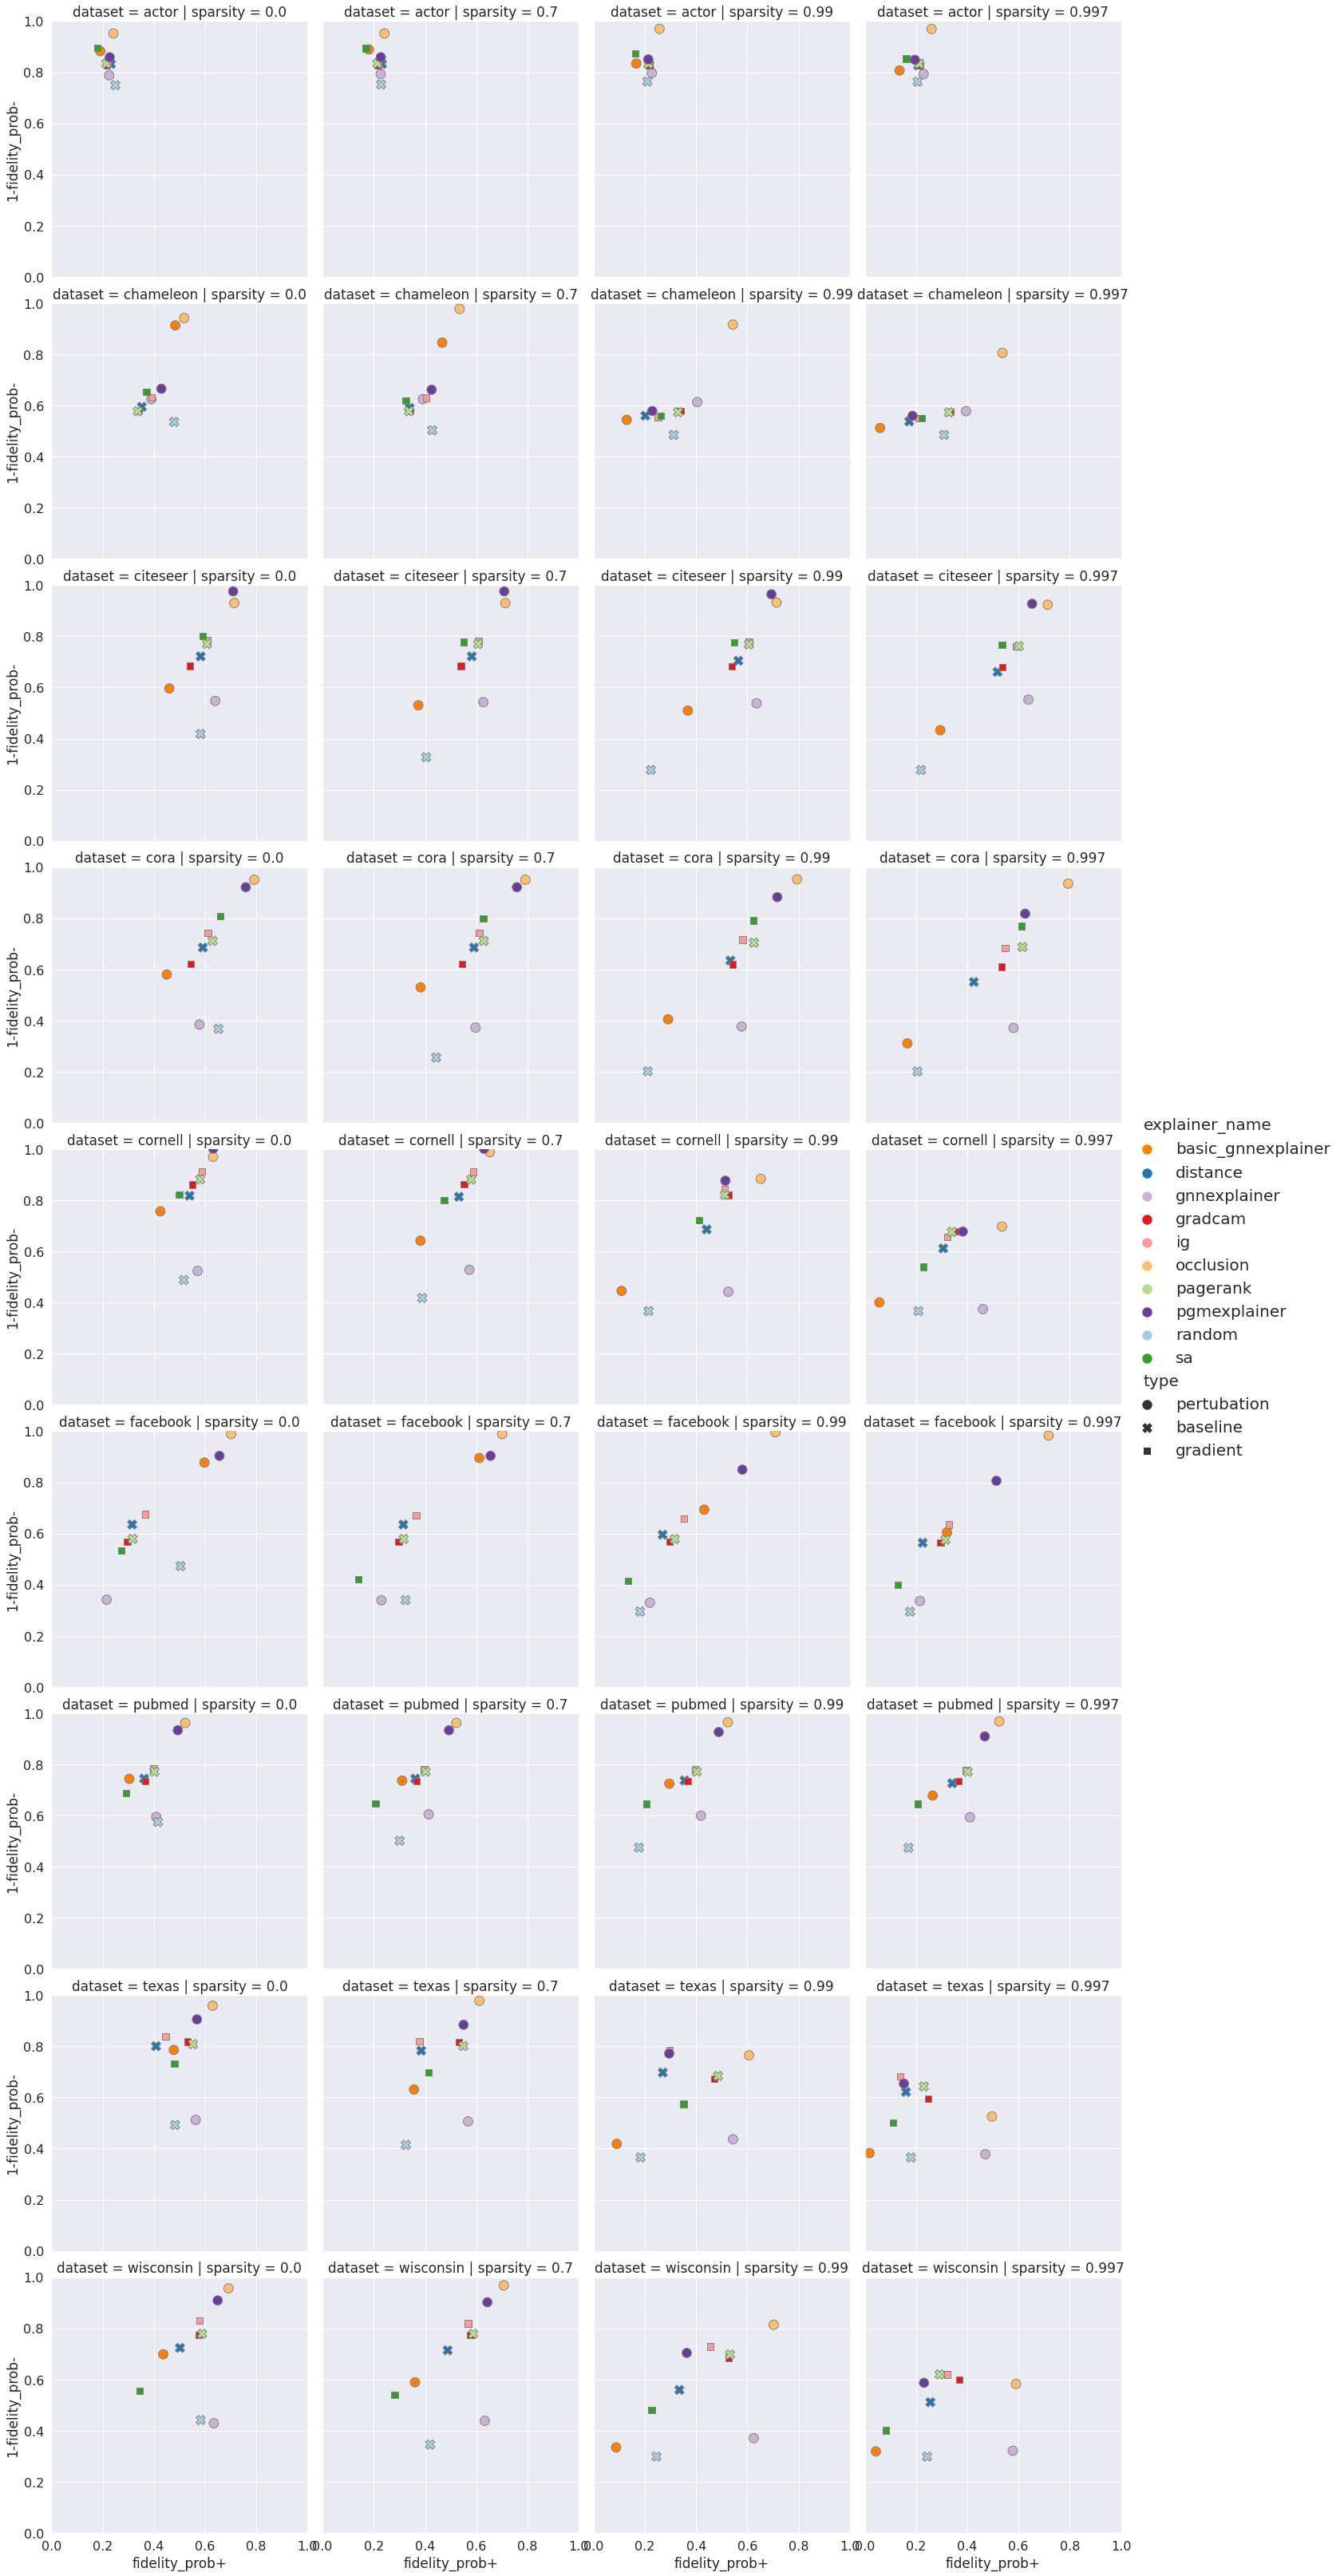

In [63]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

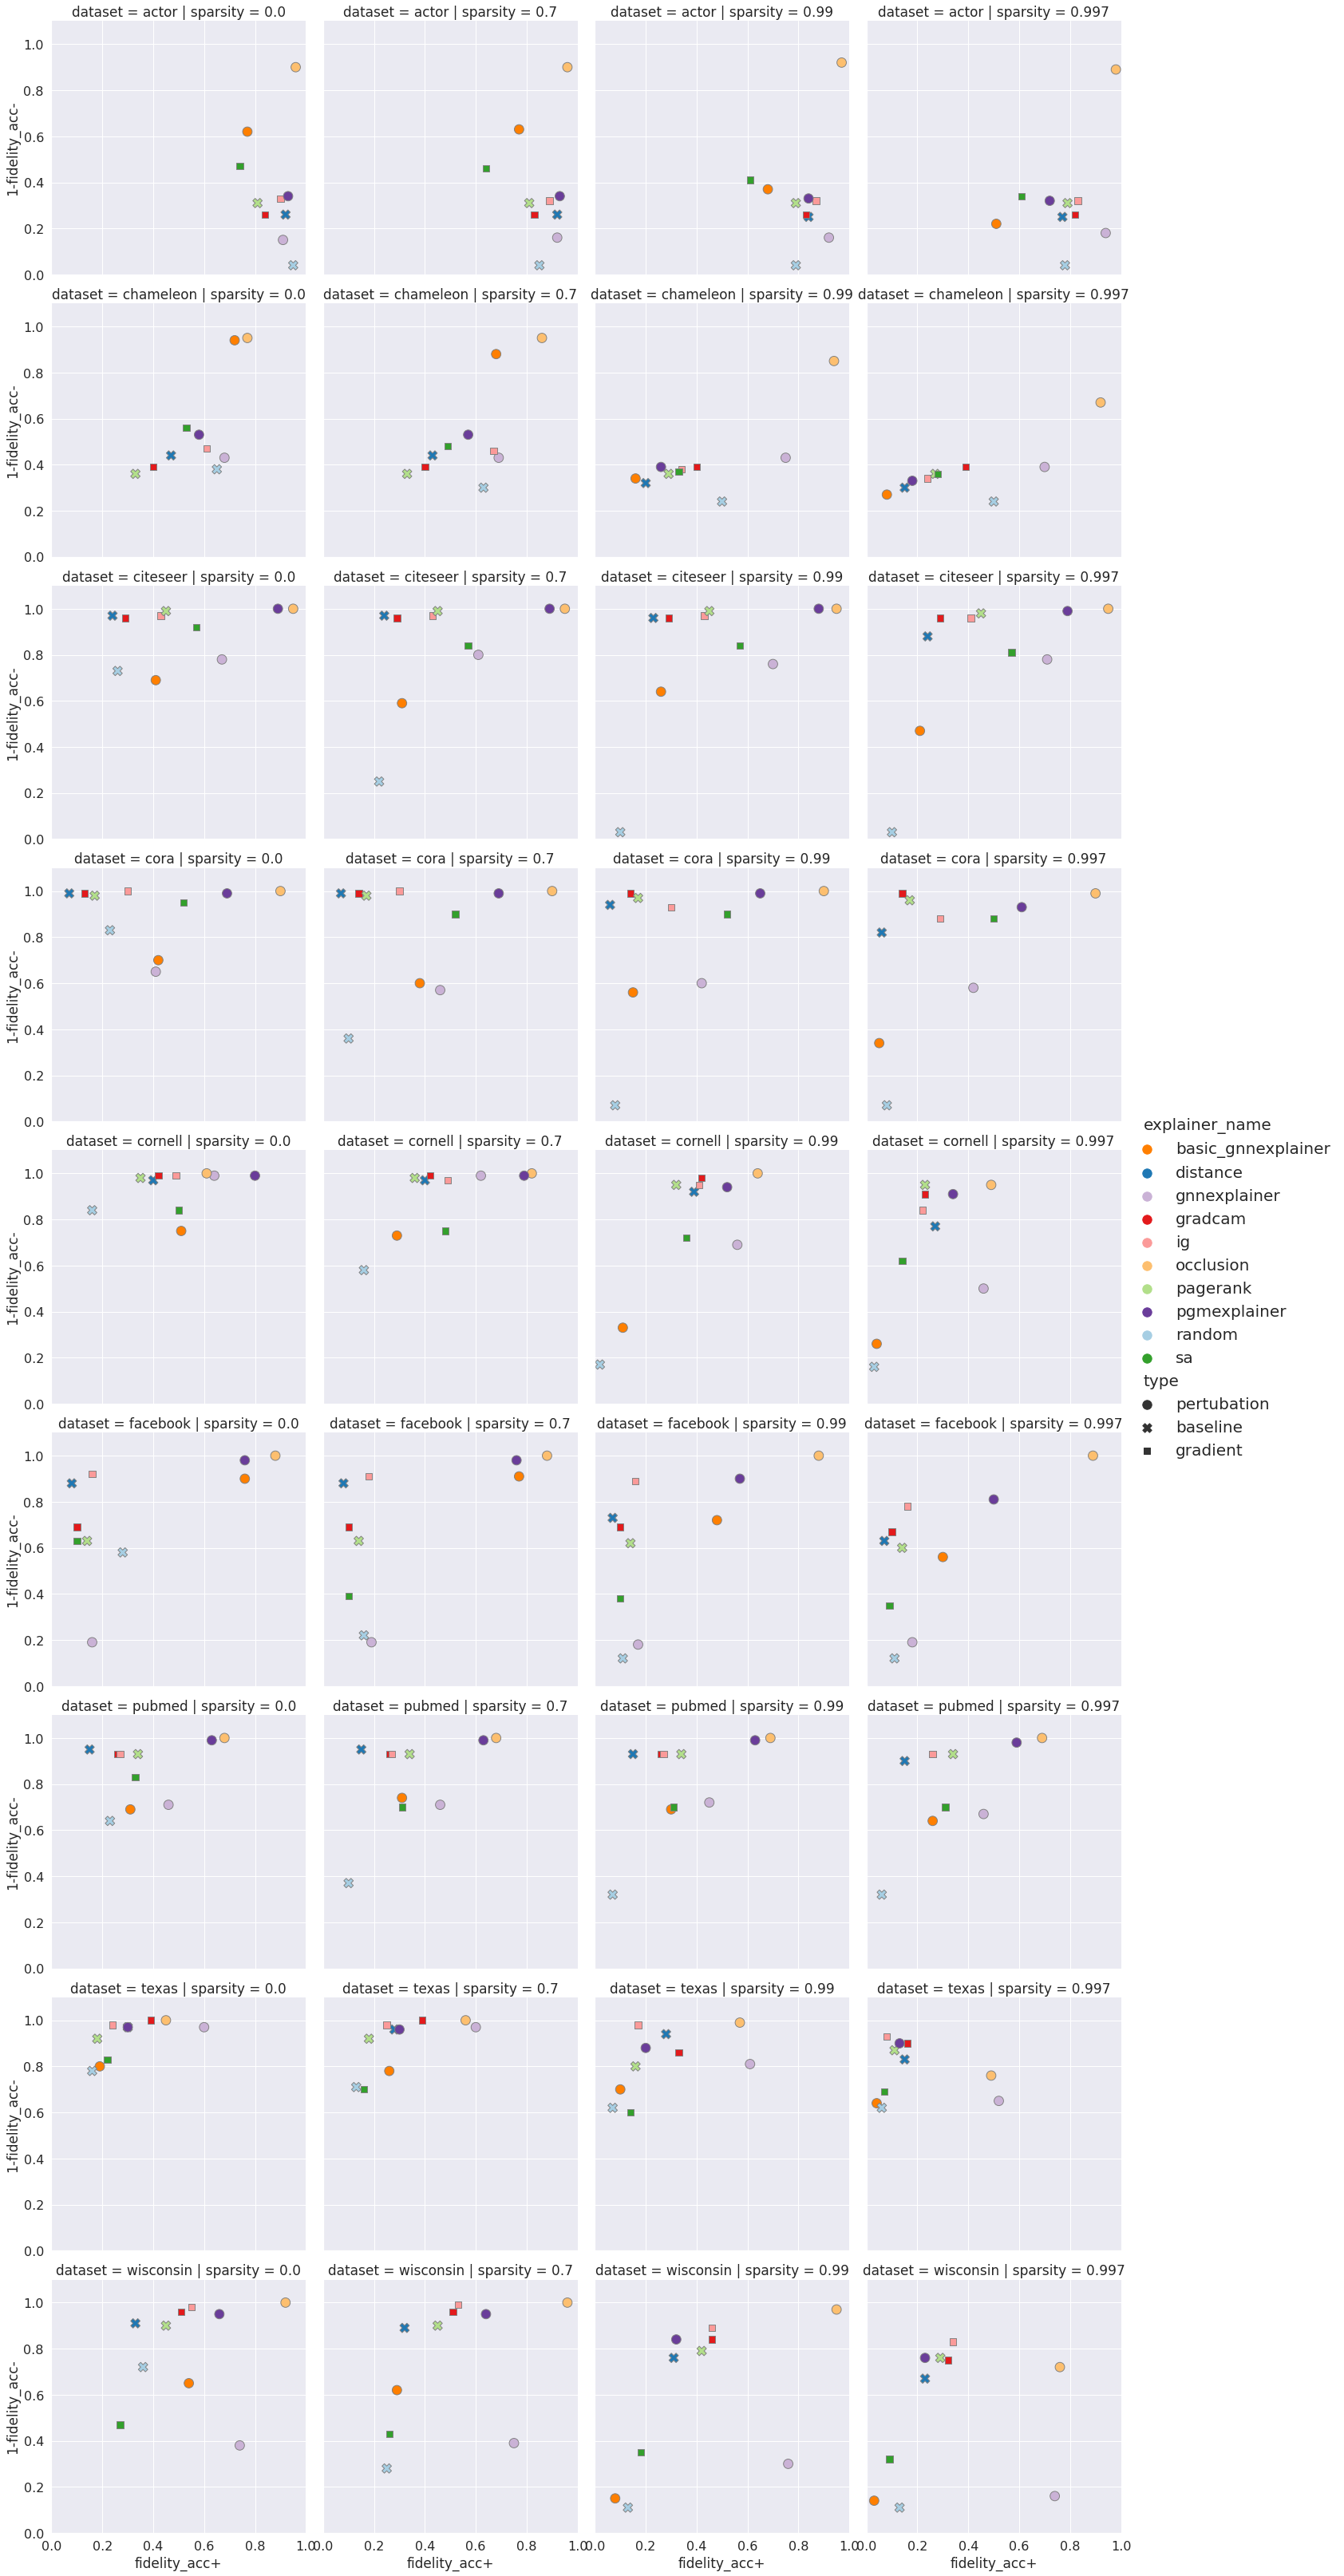

In [64]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Explain focus: GNN model

true_label_as_target = False

In [27]:
df_gnn = df_sparsity[df_sparsity['true_label_as_target']==False].reset_index()

## Hard mask

In [29]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==True]

In [30]:
df0 = df_gnn_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.313041,0.282687,0.246943,0.315667,0.289584
sa,0.644598,0.694838,0.413187,0.360550,0.528293
gnnexplainer,0.734857,0.785048,0.771389,0.625128,0.729105
basic_gnnexplainer,0.743357,0.785230,0.771124,0.625778,0.731372
occlusion,0.743357,0.785230,0.771124,0.625778,0.731372
distance,0.743357,0.785230,0.771124,0.625778,0.731372
pagerank,0.743357,0.785230,0.771124,0.625778,0.731372
pgmexplainer,0.743244,0.785805,0.771124,0.625778,0.731488
gradcam,0.744136,0.789606,0.781078,0.635345,0.737541


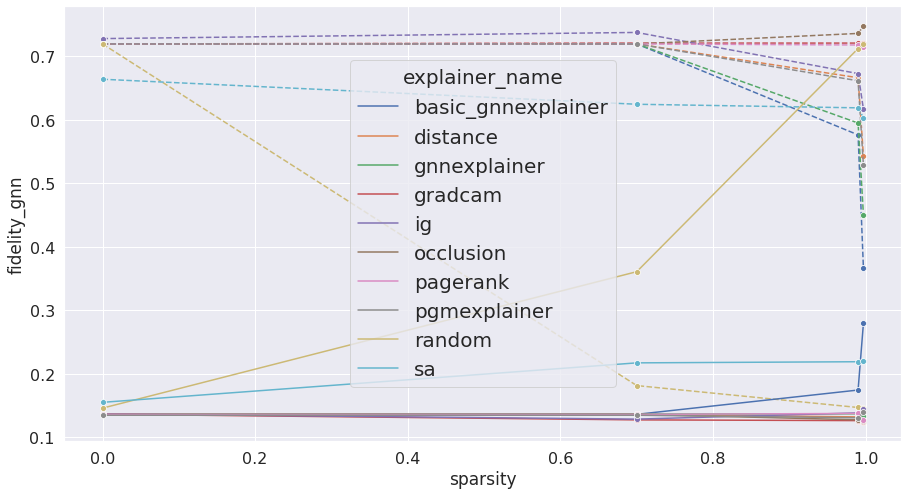

In [31]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

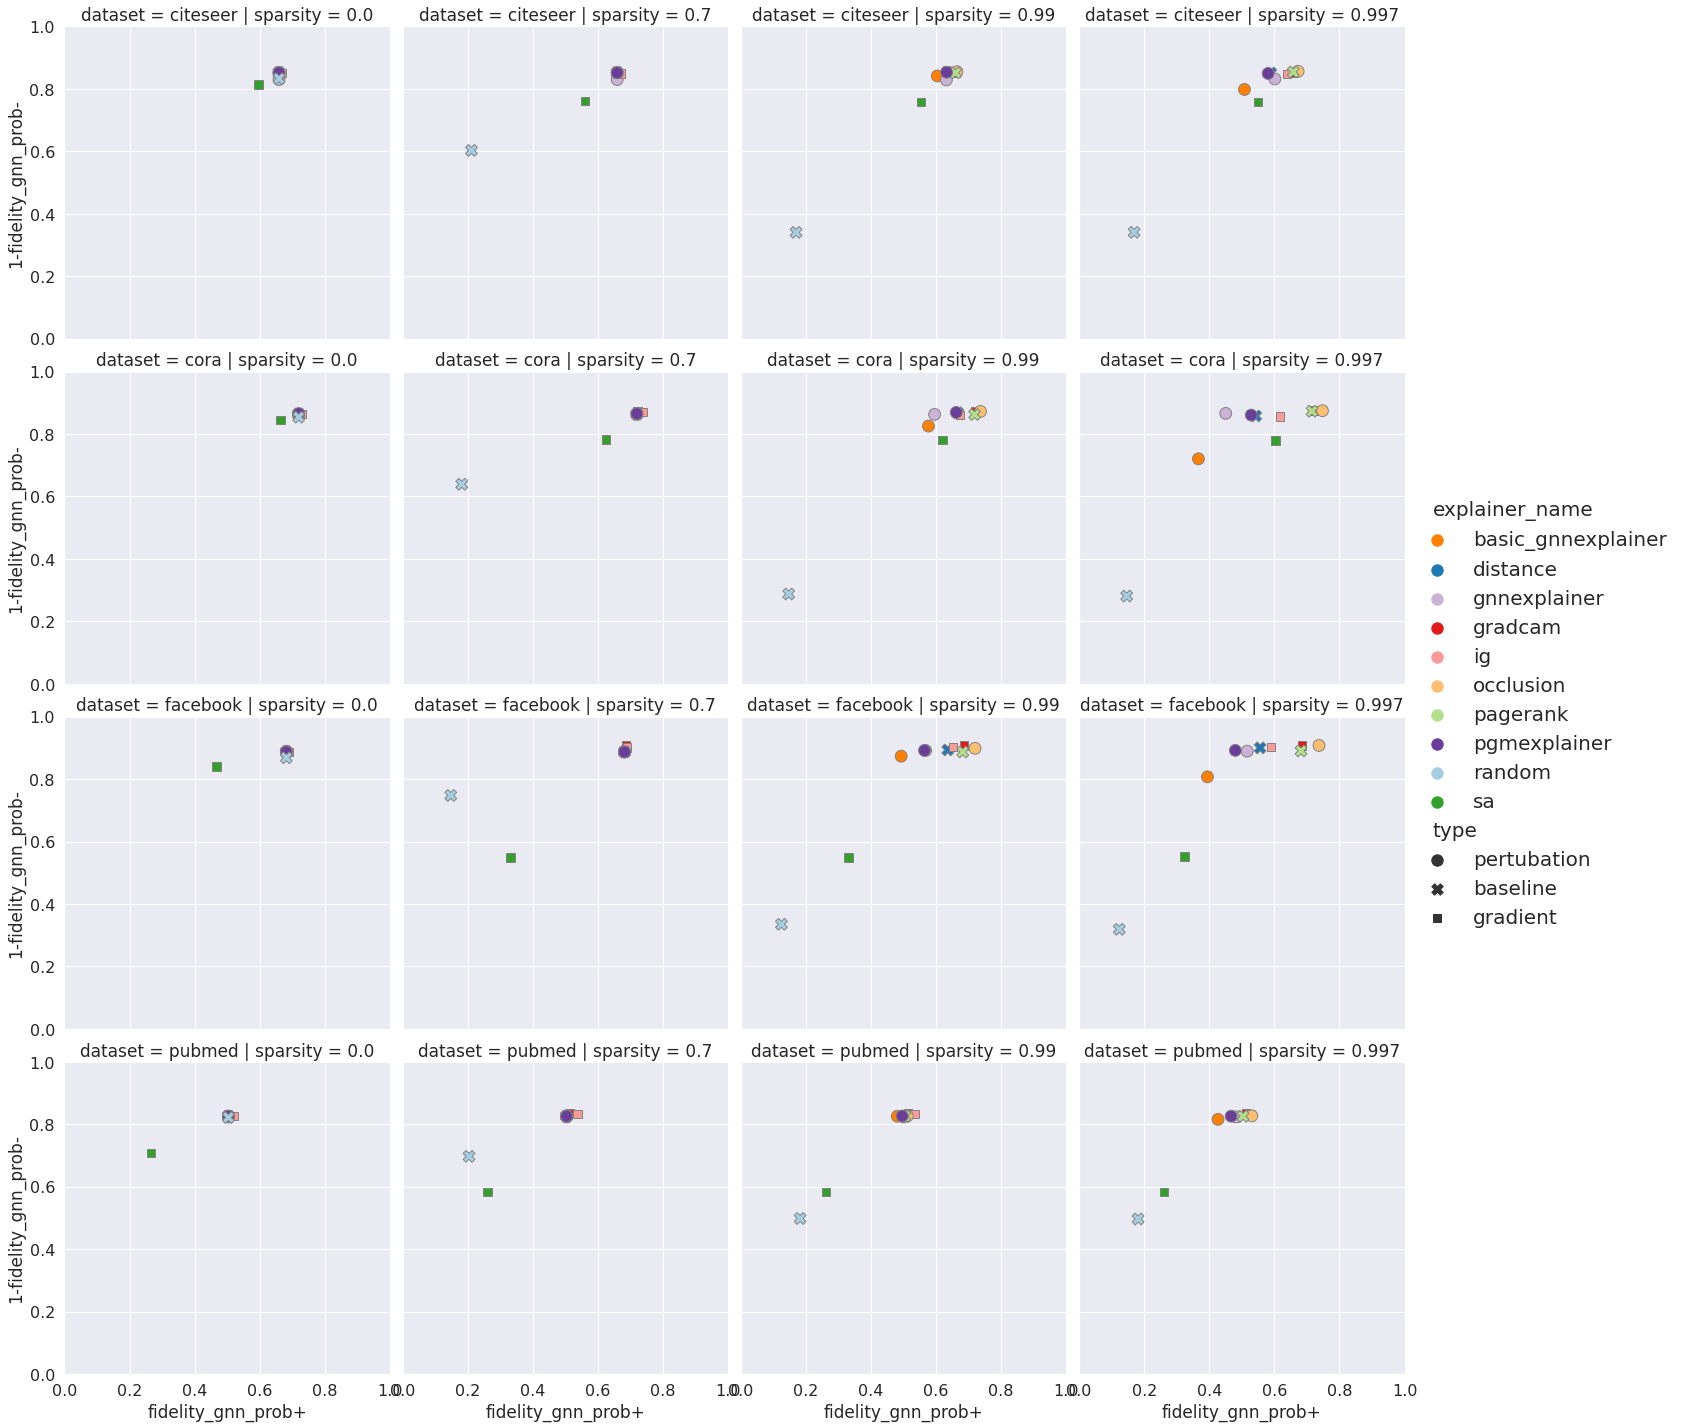

In [32]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

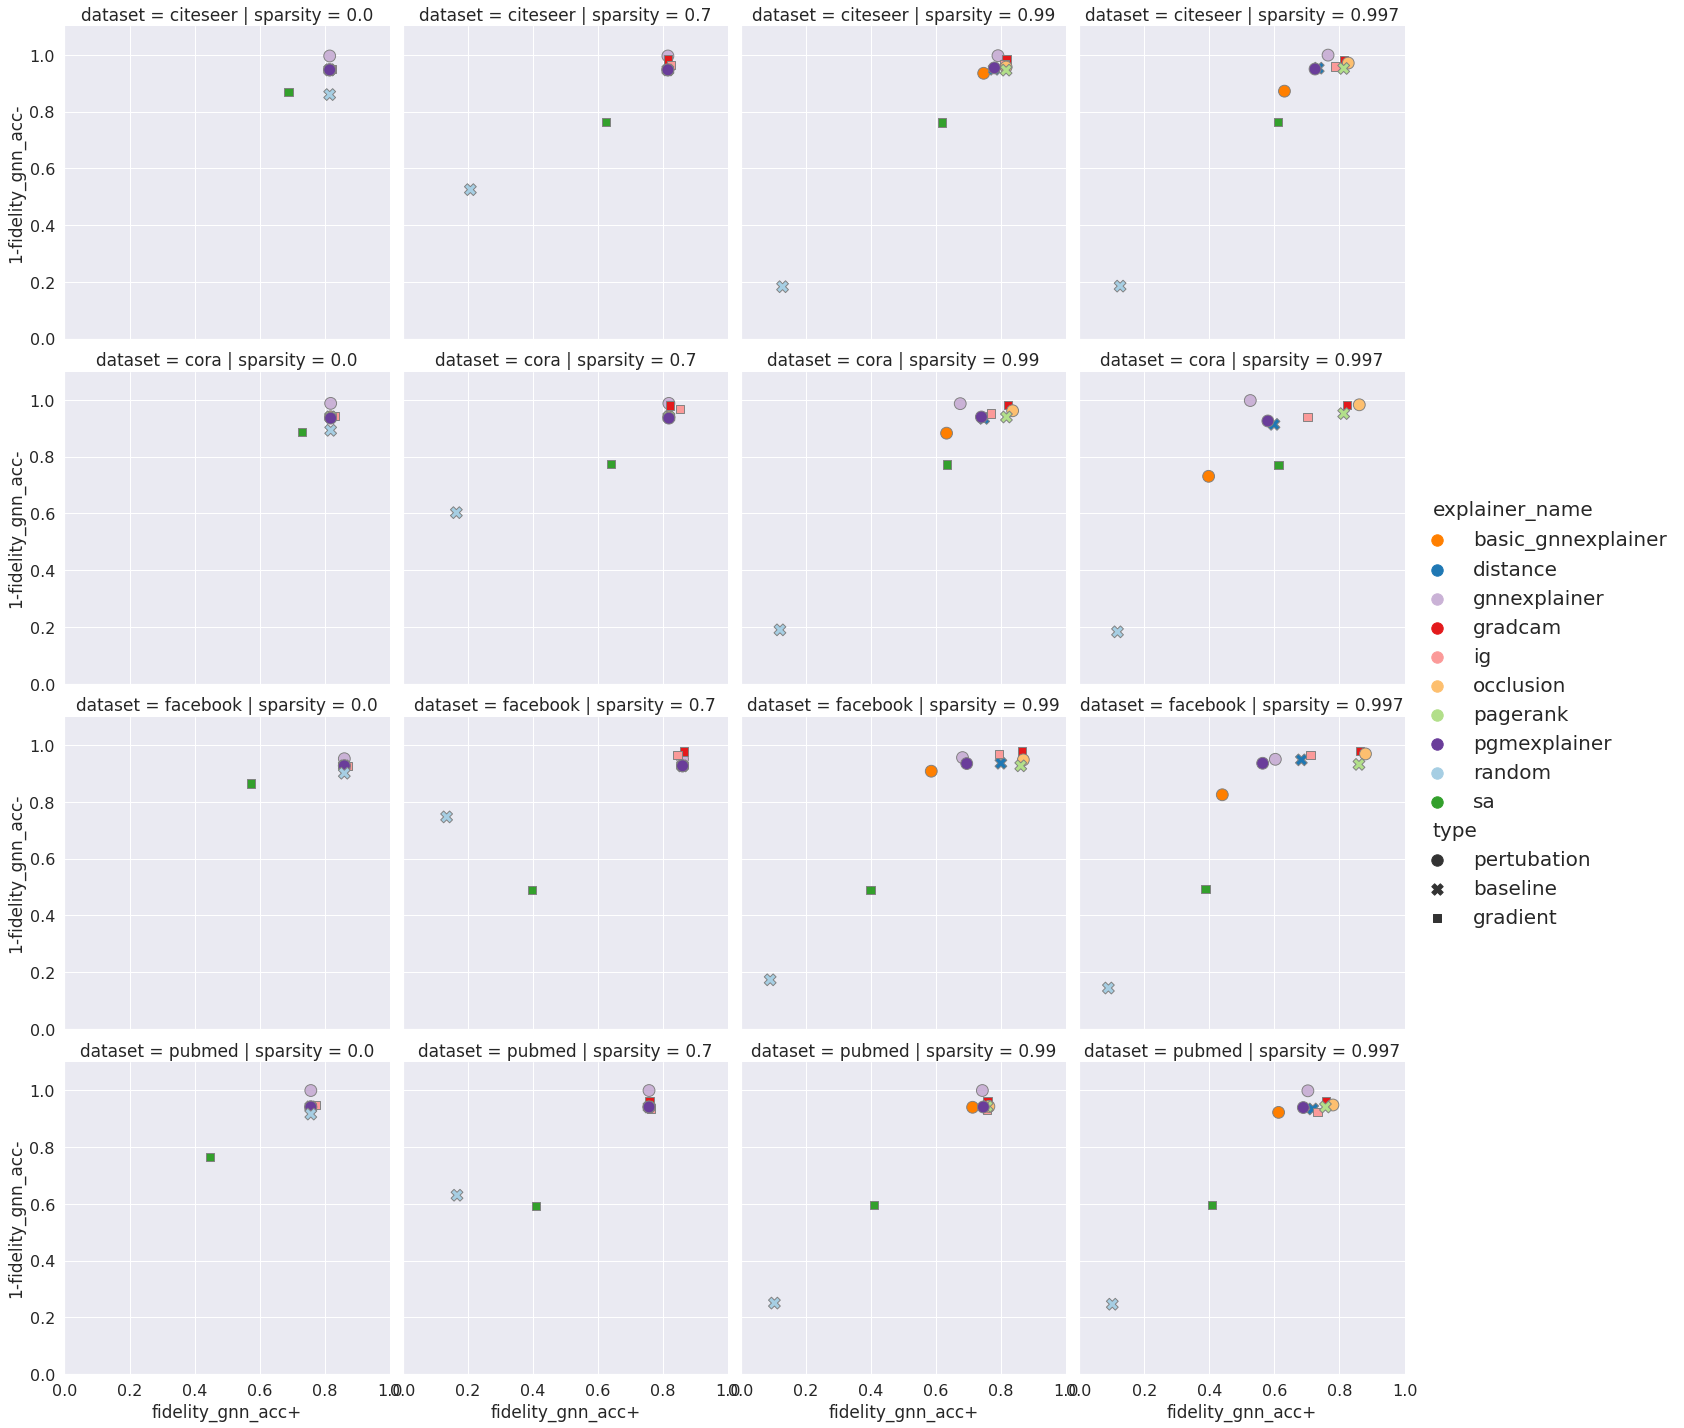

In [33]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

## Soft mask

In [34]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [35]:
##### Characterization #####
df1 = df_gnn_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.385725,0.355987,0.358685,0.371773,0.368042
sa,0.597873,0.607544,0.297810,0.253046,0.439068
gnnexplainer,0.577524,0.459764,0.308645,0.486423,0.458089
gradcam,0.584354,0.555257,0.406019,0.496785,0.510604
basic_gnnexplainer,0.448360,0.464199,0.707206,0.447129,0.516723
distance,0.618030,0.600432,0.422038,0.480247,0.530187
pagerank,0.661117,0.622888,0.413093,0.529788,0.556722
ig,0.649084,0.630845,0.480648,0.527876,0.572113
pgmexplainer,0.763882,0.755579,0.721810,0.625842,0.716778


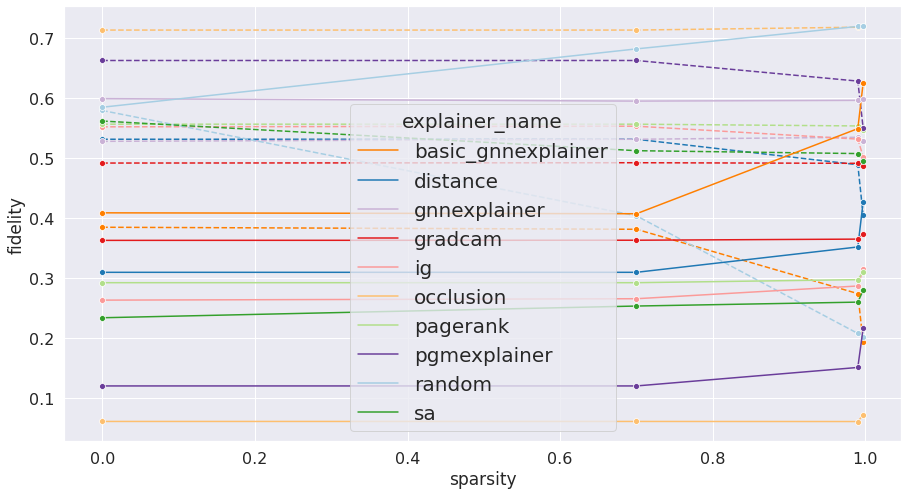

In [36]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

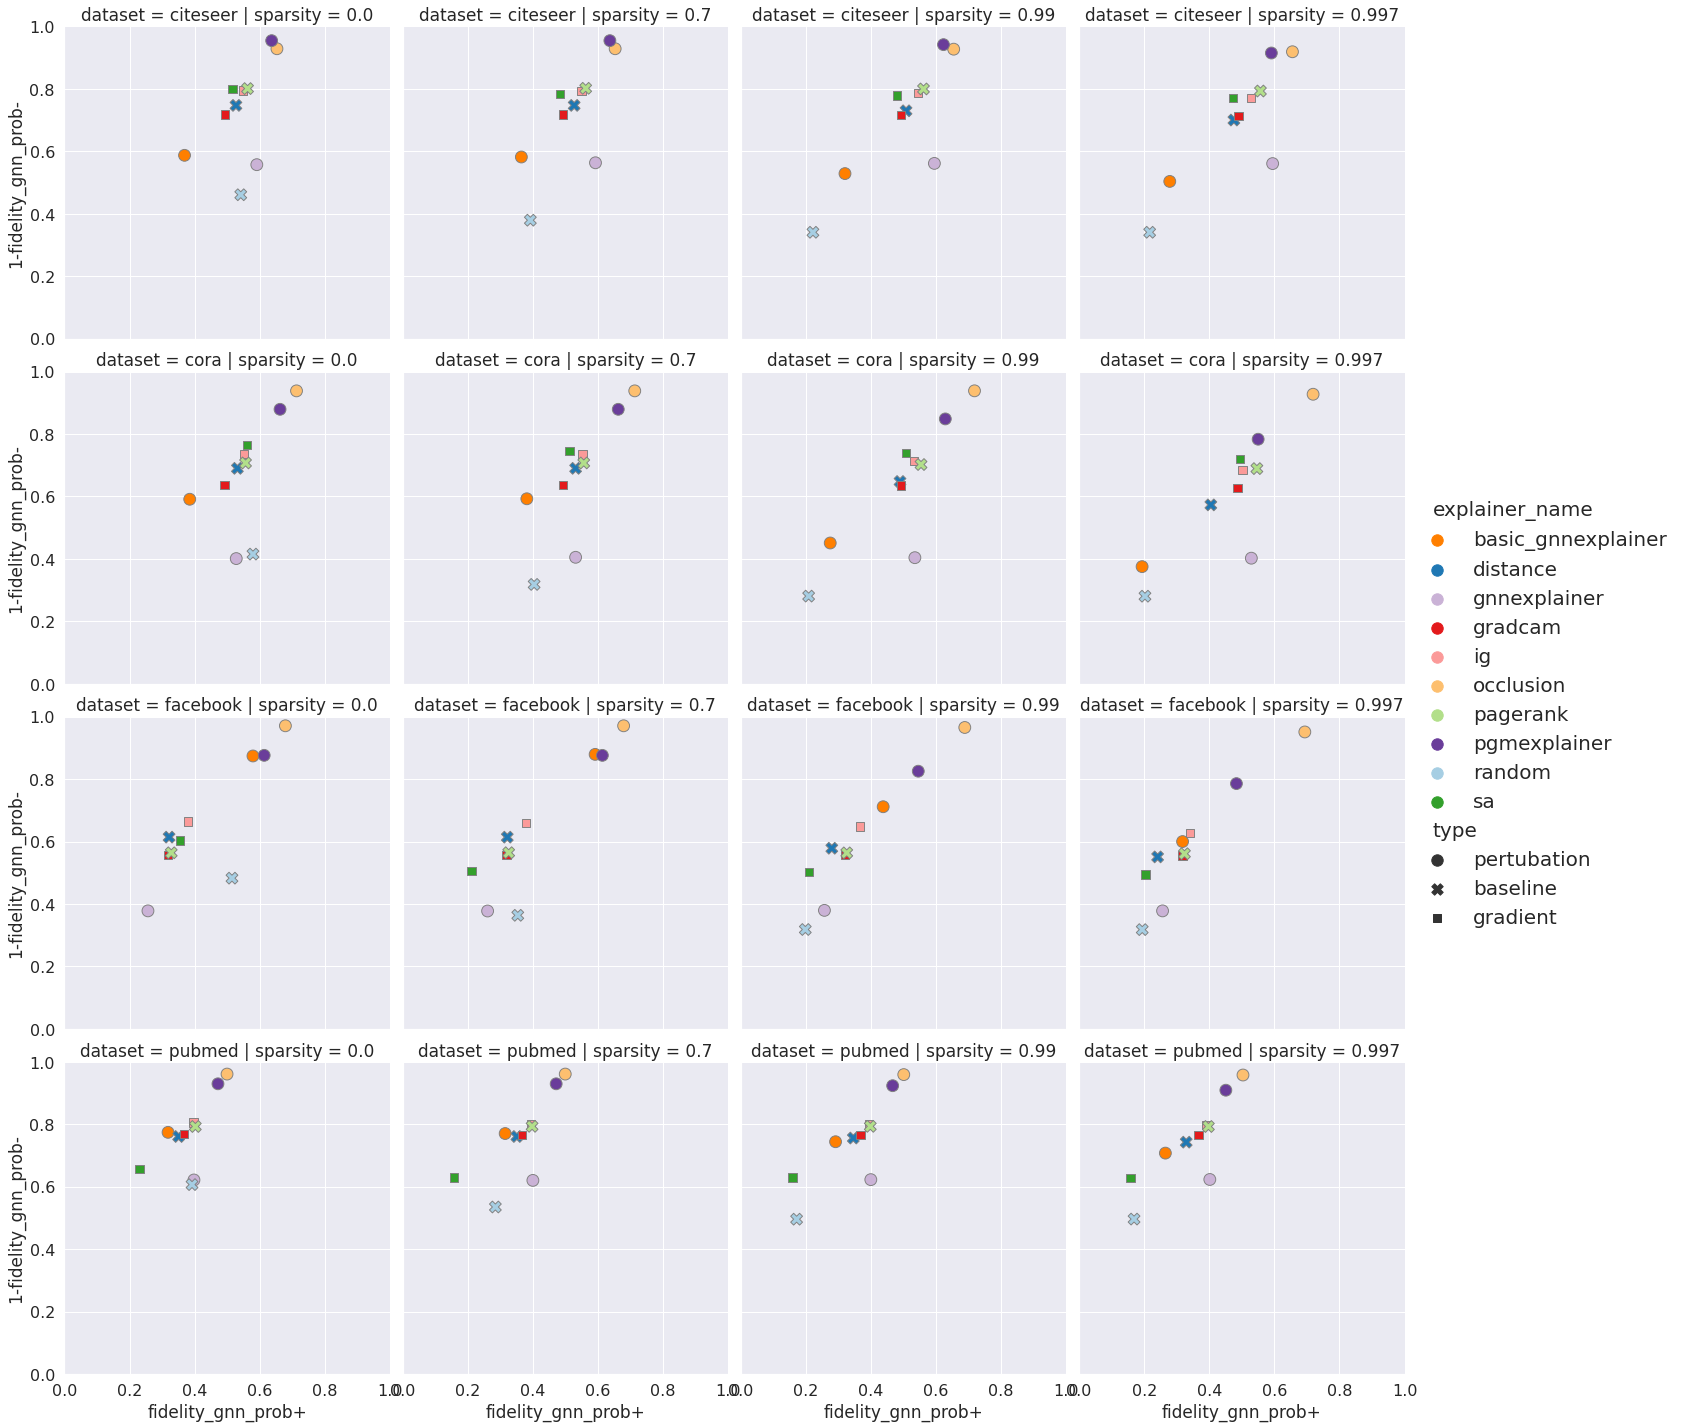

In [37]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

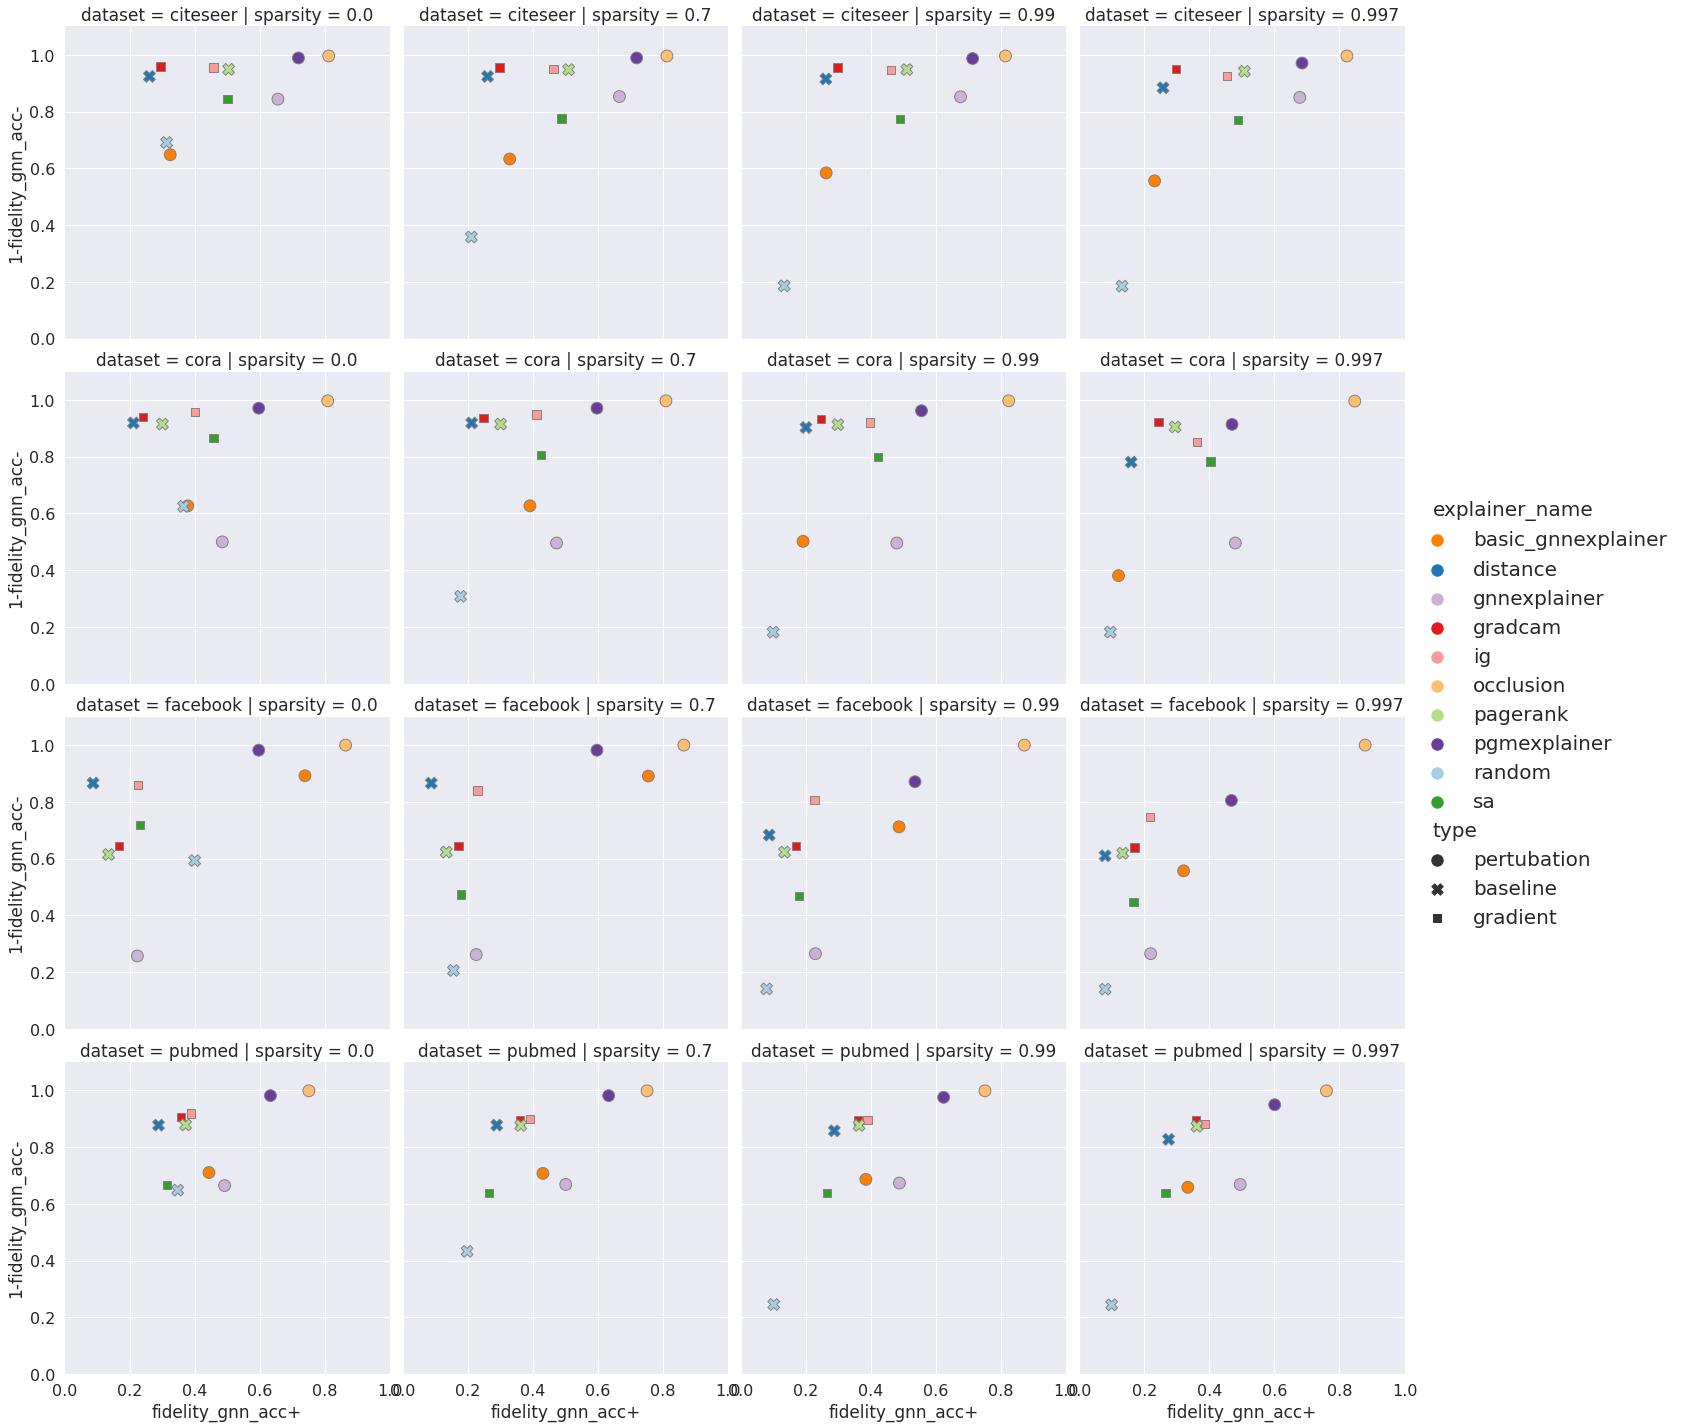

In [38]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Characterization Summary

In [87]:
sparsity = 0.99
names = ["_hard", "_soft", "_gnn_hard", "_gnn_soft"]
dfs = []
for name in names:
    df = eval("df"+name).groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
    df_small = df[df.sparsity==sparsity]
    res_init = df_small[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
    res_init.groupby(by=['dataset', 'explainer_name']).mean()
    #### Average characterization power among datasets for sparsity=0.7 ####
    df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
    df_char['charact'] = df_char.mean(axis=1)
    df_char.sort_values(by=['charact'])

    c = df_char.rename_axis(None, axis=1).reset_index()
    c = c[["explainer_name", "charact"]]
    dfs.append(c)
    

    

NameError: name 'df_gnn_hard' is not defined

In [52]:
for i in range(4):
    locals()["c"+names[i]] = dfs[i]

In [53]:
s_phen = pd.merge(dfs[0], dfs[1], on="explainer_name", how="outer", suffixes=["_phen_hard", "_phen_soft"])
s_gnn = pd.merge(dfs[2], dfs[3], on="explainer_name", how="outer", suffixes=["_gnn_hard", "_gnn_soft"])
summary = pd.merge(s_phen, s_gnn, on="explainer_name", how="outer")
summary = summary.sort_values(by=['charact_phen_soft', 'charact_phen_hard'])
summary

,explainer_name,charact_phen_hard,charact_phen_soft,charact_gnn_hard,charact_gnn_soft
8,random,-0.058886,0.231624,0.215521,0.248262
0,basic_gnnexplainer,0.555066,0.342443,0.549364,0.353872
9,sa,0.479809,0.447273,0.521388,0.428409
2,gnnexplainer,0.693510,0.454690,0.638491,0.457107
1,distance,0.710968,0.463816,0.664608,0.458154
3,gradcam,0.829602,0.514632,0.737740,0.507341
4,ig,0.767916,0.559482,0.700629,0.542888
6,pagerank,0.820825,0.564279,0.731969,0.551020
7,pgmexplainer,0.687818,0.655678,0.641512,0.641453
5,occlusion,0.852615,0.784774,0.755008,0.759403


In [54]:
summary.to_csv(f'/cluster/home/kamara/Explain/csv/node_classification/real/summary/charact_summary_avg10expe_{sparsity}.csv')